In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


SPACESHIP_TITANIC_PATH = os.path.join("datasets", "spaceship-titanic")

def load_data(path = SPACESHIP_TITANIC_PATH):
    return pd.read_csv(os.path.join(path, "train.csv")), pd.read_csv(os.path.join(path, "test.csv"))

In [2]:
train_set, test_set = load_data()

In [3]:
df = train_set.copy()

In [4]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_set.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# EDA Univariate

## Inspecting null values

In [7]:
train_set.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Observations: 
<li>Every column except PassengerId and Transported have null values

## Set style and colour palette

In [8]:
import matplotlib
matplotlib.style.use('bmh')

In [9]:
pal = ["#CC4379", "#EA8E89", "#F0C7A6", "#C4DDA1", "#92F3C3"]

### Define r_color() function

In [10]:
def r_color(num=2, seed=None):
    if seed == None:
        seed = np.random.randint(0,500,size=1)
    np.random.seed(seed)
    print(seed)
    
    return [pal[i] for i in np.random.randint(0,5,size=num)]

### Define count_plot() function

In [11]:
def count_plot(df, column, seed=None, num=3):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=column, palette=r_color(num,seed=seed),)
    plt.title(f'count of {column} \n', fontsize=20, fontweight='bold')
    plt.ylabel('count', fontweight='bold')
    plt.xlabel(column, fontweight='bold')
    plt.show()
    
    value_counts = df[column].value_counts()
    value_perc = round(value_counts / len(df) * 100, 2)
    value_counts_df = pd.concat([value_counts, value_perc], axis=1)
    value_counts_df.columns = ['count', 'percentage']
    return value_counts_df

## HomePlanet

[282]


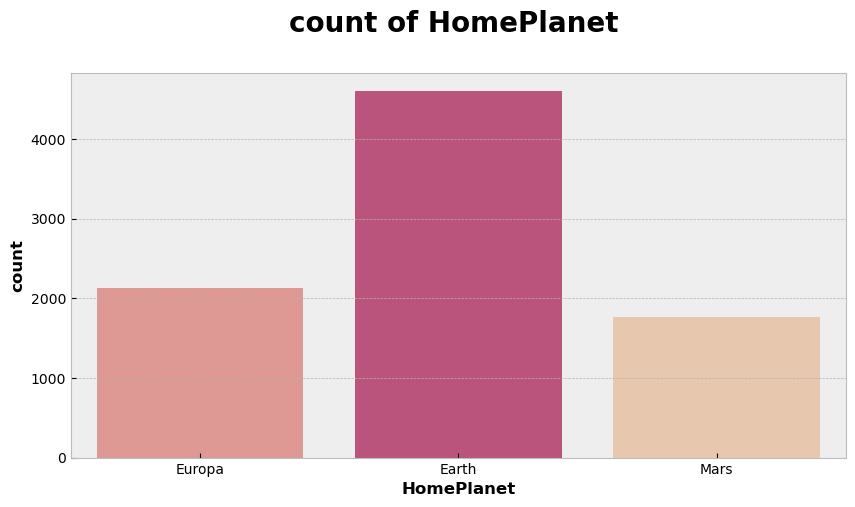

,count,percentage
Earth,4602,52.94
Europa,2131,24.51
Mars,1759,20.23


In [12]:
count_plot(train_set,'HomePlanet')

Observations: 
<li>More than the half of people comes from the Earth
<li>The rest is splitted almost equally between Mars and Europa

## CryoSleep

[133]


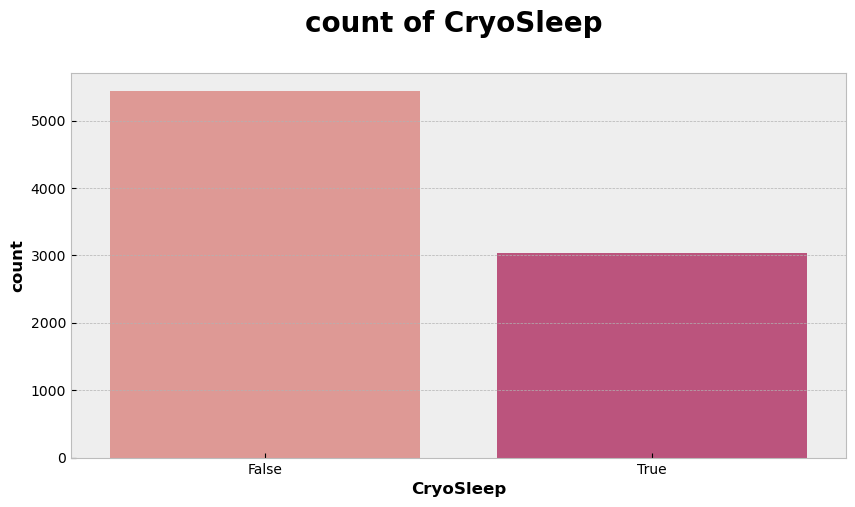

,count,percentage
False,5439,62.57
True,3037,34.94


In [13]:
count_plot(train_set, 'CryoSleep')

Observations: 
<li>Slightly imbalanced, almost double the count for False than for True
<li>About 2/3 of people were not in CryoSleep

## Cabin

In [14]:
train_set['Cabin'] = train_set['Cabin'].fillna('0')
train_set['Cabin'] = train_set['Cabin'].str.split('/')
train_set['Cabin']

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
8688      [A, 98, P]
8689    [G, 1499, S]
8690    [G, 1500, S]
8691     [E, 608, S]
8692     [E, 608, S]
Name: Cabin, Length: 8693, dtype: object

In [15]:
train_set['Cabin'].isnull().sum()

0

### Define get_cabin() function

In [16]:
def get_cabin(x):
    if type(x)=='float':
        return np.nan
    elif len(x)>1:
        return x[0]
    else:
        return x[0]

In [17]:
train_set['Cabin_zone'] = train_set['Cabin'].apply(get_cabin)

[1]


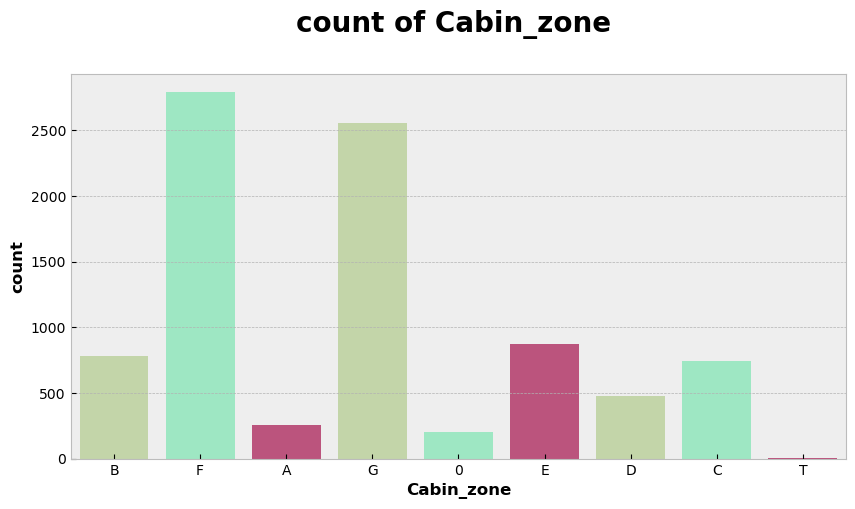

,count,percentage
F,2794,32.14
G,2559,29.44
E,876,10.08
B,779,8.96
C,747,8.59
D,478,5.50
A,256,2.94
0,199,2.29
T,5,0.06


In [18]:
count_plot(train_set, 'Cabin_zone')

Observations: 
<li>Cabin_zone: Imbalanced data set. T, 0, A are represented the least. <b>Reduce Dimensions</b>

### Define get_code() function

In [19]:
def get_code(x):
    if type(x)=='float':
        return np.nan
    elif len(x)>1:
        return x[2]
    else:
        return x[0]

In [20]:
train_set['Cabin_code'] = train_set['Cabin'].apply(get_code)

[255]


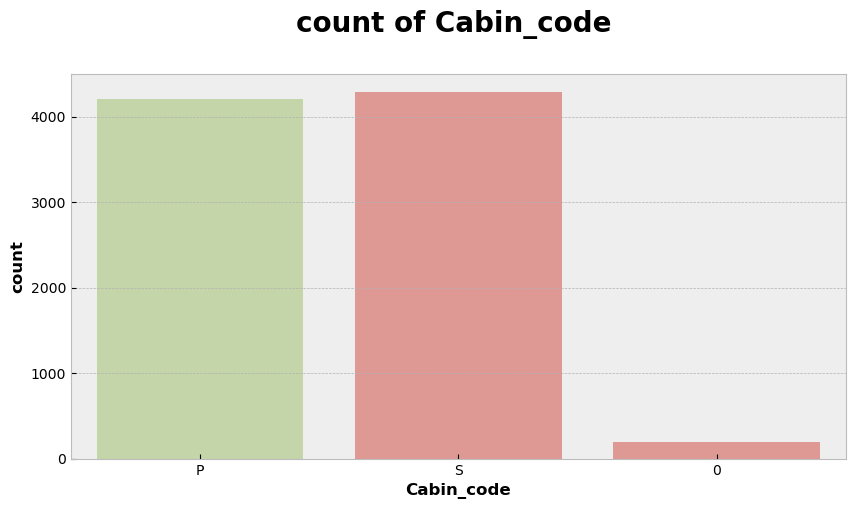

,count,percentage
S,4288,49.33
P,4206,48.38
0,199,2.29


In [21]:
count_plot(train_set,'Cabin_code')

Observations: 
<li>Cabin_code: Balanced data between P and S. 0 is unbalanced with other classes. <b>Reduce Dimensions</b>

## Destination

[486]


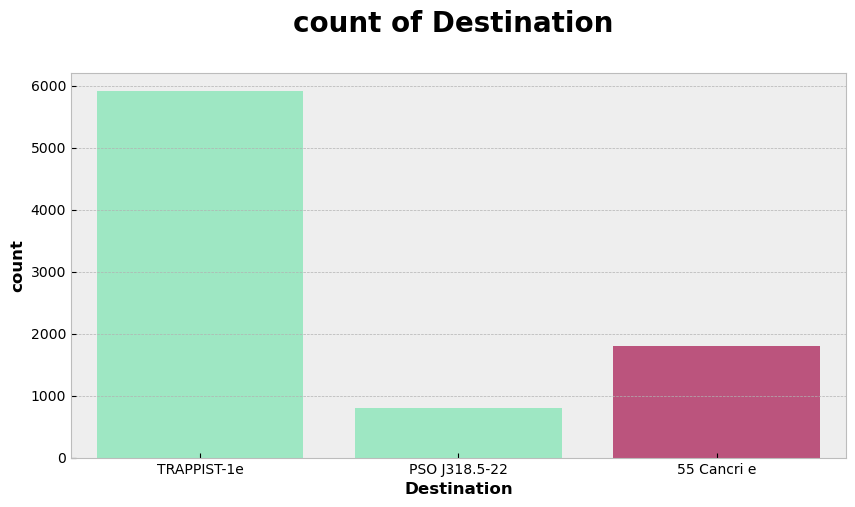

,count,percentage
TRAPPIST-1e,5915,68.04
55 Cancri e,1800,20.71
PSO J318.5-22,796,9.16


In [22]:
count_plot(train_set, 'Destination')

Observations: 
<li>Destination: TRAPPIST-1e makes up the majority. 55 Cancri e and PSO J318.5-22 are under represented. <b>Reduce Dimensions</b>

### Define hist_plot() function

In [23]:
def hist_plot(df, column, bins=30, hue=None, num=3):
    plt.figure(figsize=(12,5))
    sns.histplot(data=df, x=column, color=r_color(num)[0], bins=bins)
    plt.title(f'\n{column}\n',fontsize=22,fontweight='bold')
    plt.show()

## Age

[314]


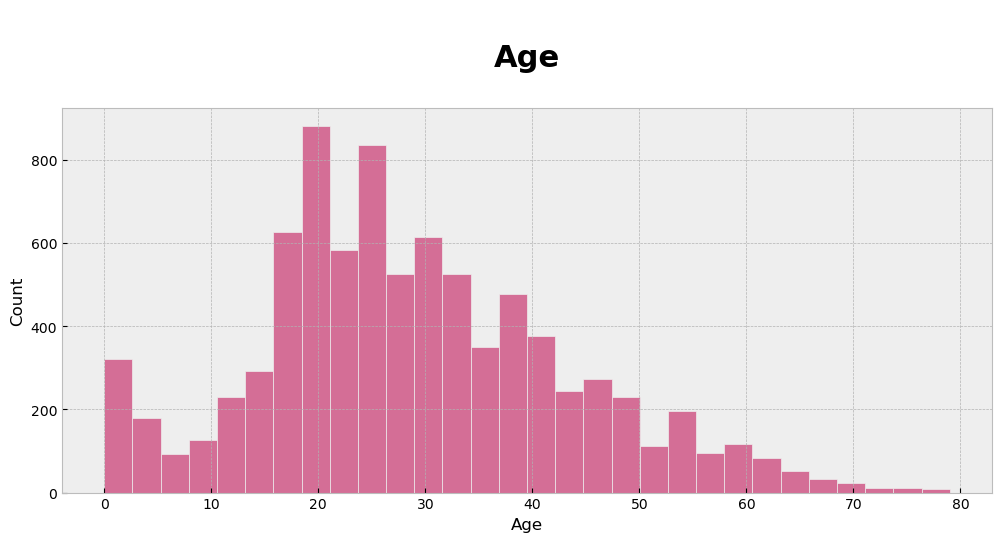

In [24]:
hist_plot(train_set,'Age')

Observations: 
<li>Age: semi-normal distribution with tail on right side. <b>Treat outliers</b>

## VIP

[342]


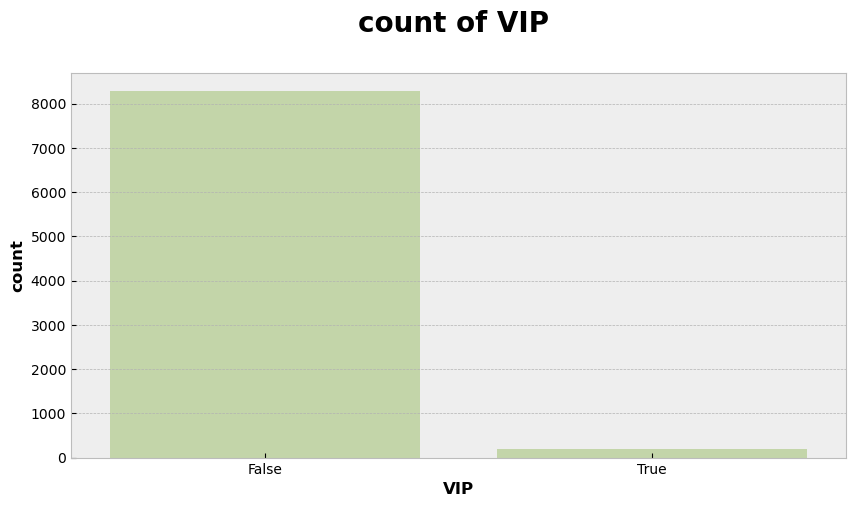

,count,percentage
False,8291,95.38
True,199,2.29


In [25]:
count_plot(train_set, 'VIP')

Observations: 
<li>VIP: Large imbalance. True only represents 200 rows (2,29% of the dataset lenght) <b>Investigate if has any relationship to target, if not could drop the column</b>

## RoomService

[242]


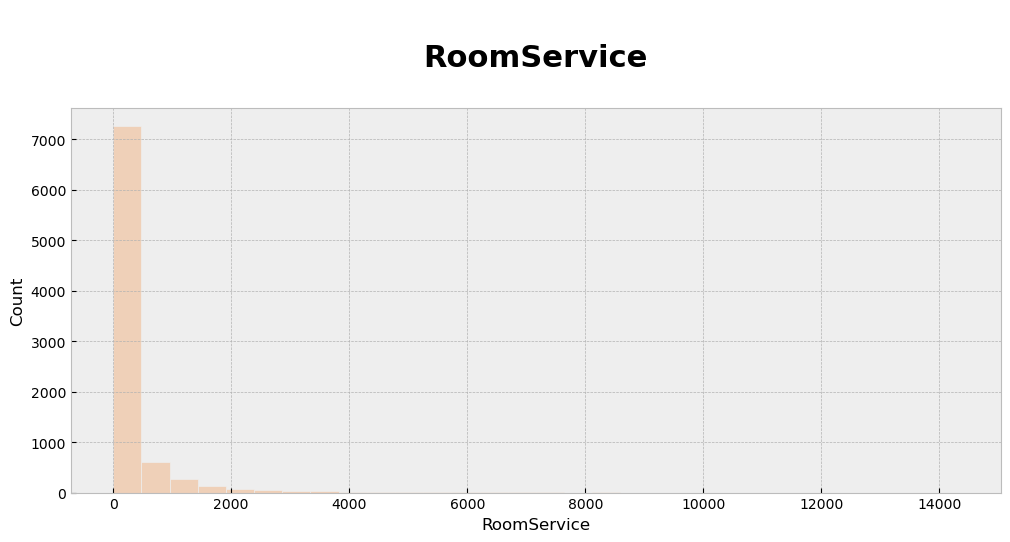

In [26]:
hist_plot(train_set, 'RoomService')

Observations: 
<li>RoomService: <b>Treat outliers on right hand side</b>

## FoodCourt

[36]


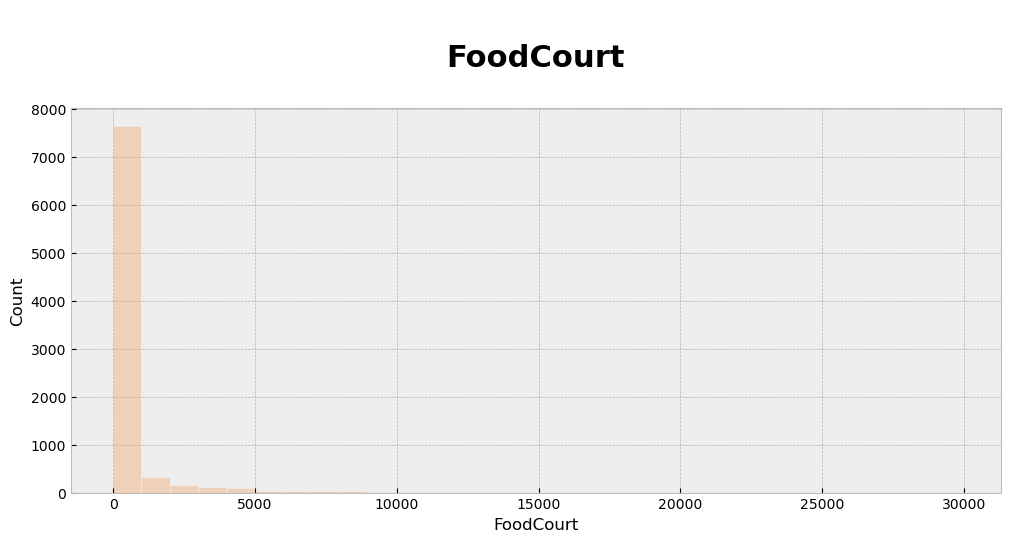

In [27]:
hist_plot(train_set, 'FoodCourt')

Observations: 
<li>FoodCourt: <b>Treat outliers on right hand side</b>

## ShoppingMall

[250]


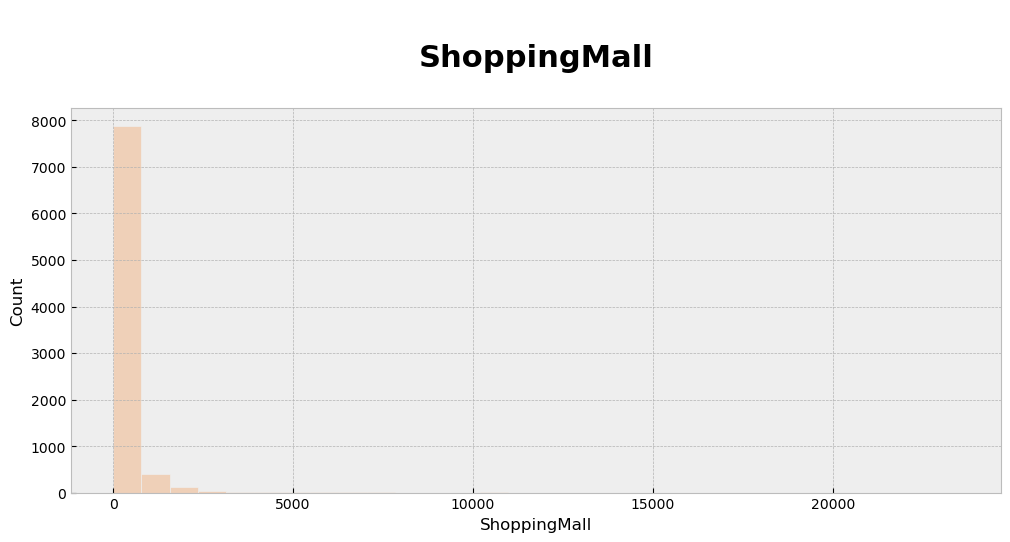

In [28]:
hist_plot(train_set,"ShoppingMall")

Observations: 
<li>ShoppingMall: <b>Treat outliers on right hand side</b>

## Spa

[58]


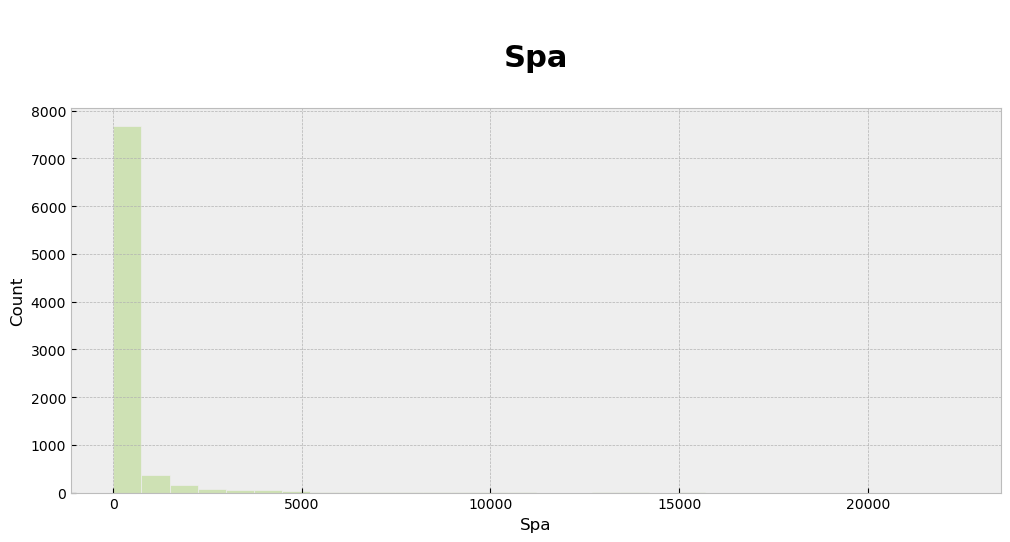

In [29]:
hist_plot(train_set, "Spa")

Observations: 
<li>Spa: <b>Treat outliers on right hand side</b>

## VRDeck

[398]


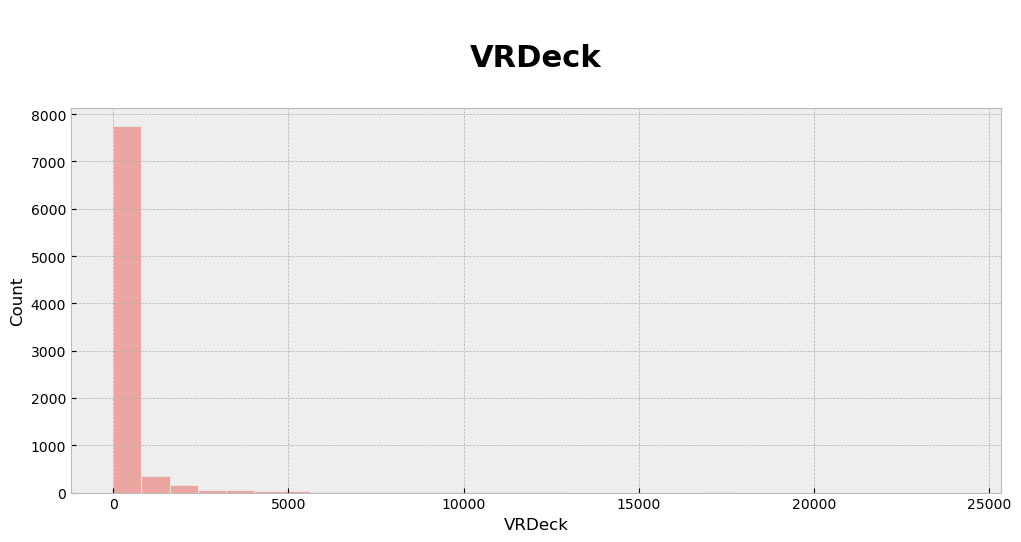

In [30]:
hist_plot(train_set, "VRDeck")

Observations: 
<li>VRDeck: <b>Treat outliers on right hand side</b>

## Transported

[106]


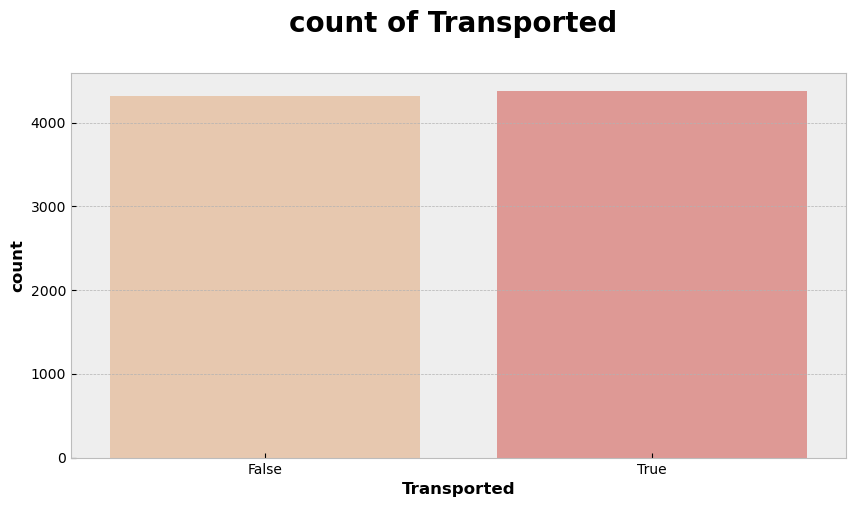

,count,percentage
True,4378,50.36
False,4315,49.64


In [31]:
count_plot(train_set,"Transported")

# EDA - Bivariate with Target

### Define dis_plot() function

In [32]:
def dis_plot(df, column):
    df_tmp1 = pd.DataFrame(df[column].value_counts()/ sum(df[column].value_counts())) #Values divided by total values
    df_tmp2 = pd.DataFrame(df[df['Transported'] == 1][column].value_counts() / sum(df[df['Transported']==1][column].value_counts())) #portion of Transported for each value in the column against of total transported
    df_tmp3 = df_tmp2 - df_tmp1 # Get the difference transported versus total
    df_final = pd.concat([df_tmp1, df_tmp2, df_tmp3], axis=1) #Concat the dataframes
    df_final.columns = [f'% {column} Start', f'% {column} Transp', 'Difference'] #Change the columns' name
    sns.displot(data=df, x=column, col='Transported', color=r_color(1)[0], bins=30)
    plt.show()
    sns.histplot(data=df_final['Difference'], color=r_color(1)[0], bins=30)
    plt.title(f'Difference in proportion of {column}')
    plt.show()
    return df_final.T

## HomePlanet and Transported

[52]


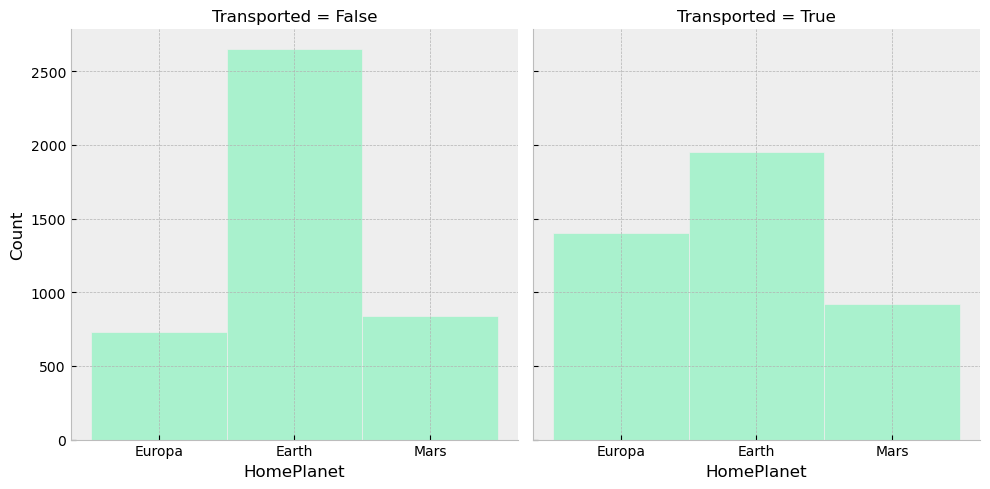

[267]


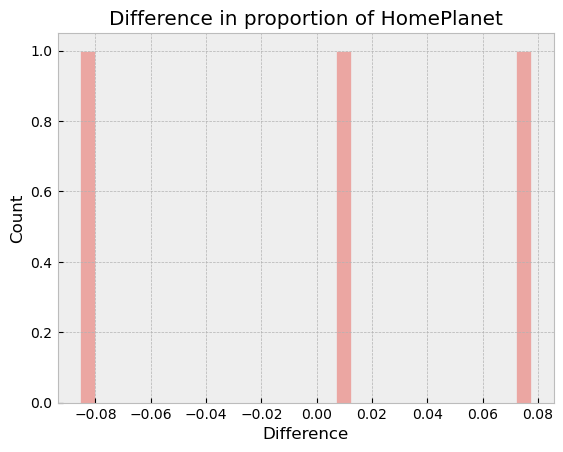

,Earth,Europa,Mars
% HomePlanet Start,0.541922,0.250942,0.207136
% HomePlanet Transp,0.456374,0.328421,0.215205
Difference,-0.085548,0.077479,0.008069


In [33]:
dis_plot(train_set,'HomePlanet')

Observations: 
<li>People from Earth were transported an 8% less.</li>
<li>People from Europa were transported an 8% more.</li>

## Cabin and Transported

[180]


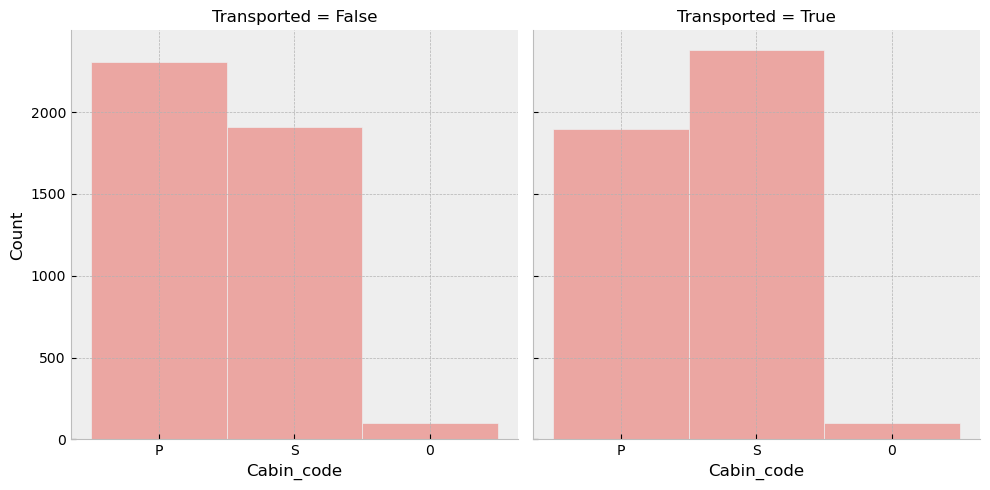

[278]


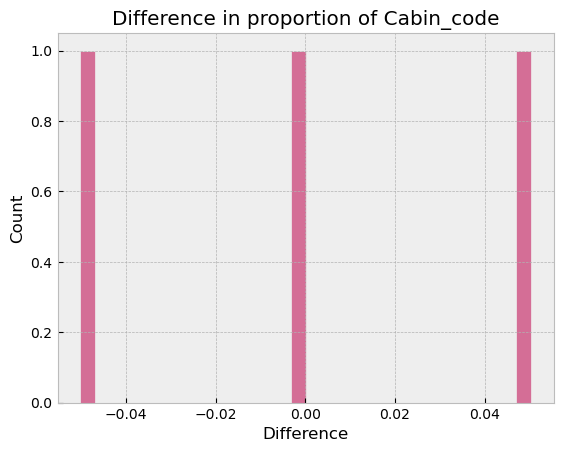

,S,P,0
% Cabin_code Start,0.493270,0.483838,0.022892
% Cabin_code Transp,0.543627,0.433531,0.022841
Difference,0.050357,-0.050306,-0.000051


In [34]:
dis_plot(train_set, 'Cabin_code')

[349]


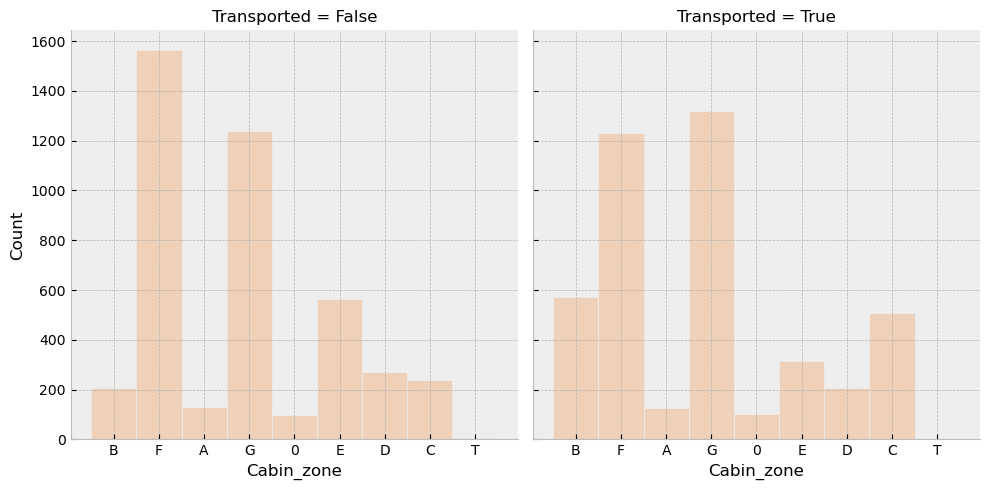

[47]


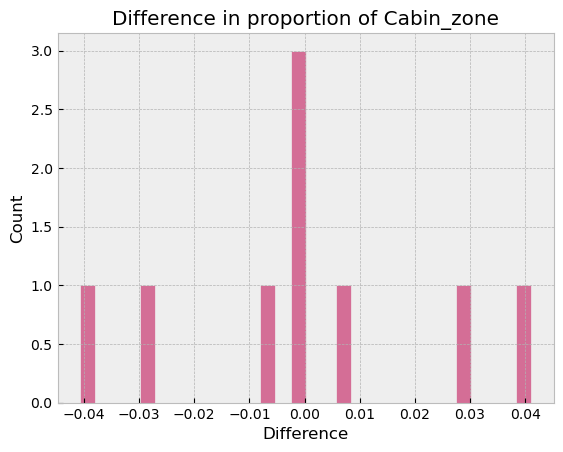

,F,G,E,B,C,D,A,0,T
% Cabin_zone Start,0.321408,0.294375,0.100771,0.089612,0.085931,0.054987,0.029449,0.022892,0.000575
% Cabin_zone Transp,0.280722,0.301736,0.071494,0.130653,0.116035,0.047282,0.029009,0.022841,0.000228
Difference,-0.040686,0.007361,-0.029277,0.041041,0.030104,-0.007705,-0.000440,-0.000051,-0.000347


In [35]:
dis_plot(train_set, 'Cabin_zone')

Observations: 
<li>Cabin:code Best chance of being transported was S.</li>
<li>Cabin zone: B and C show the best chance of survival. F increased chance of not being transported</li>
<li>G,A,0,T: show almost no change - <b>Dimension reduction</b></li>

## Destination and Transported

[72]


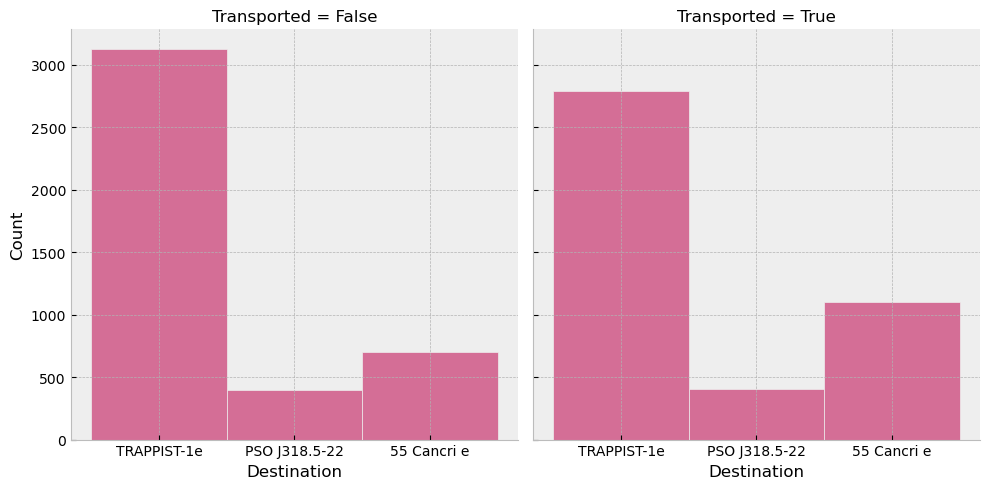

[275]


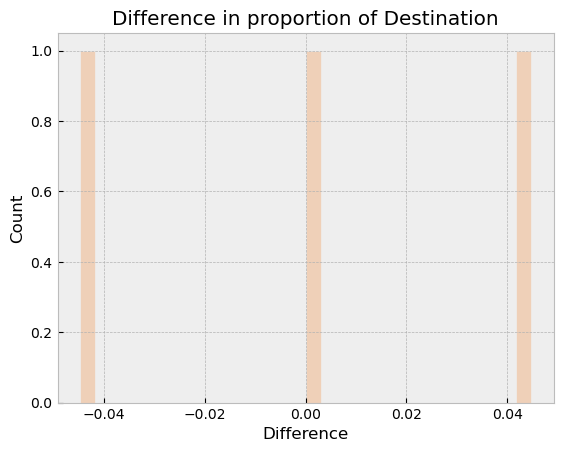

,TRAPPIST-1e,55 Cancri e,PSO J318.5-22
% Destination Start,0.694983,0.211491,0.093526
% Destination Transp,0.650257,0.256183,0.093560
Difference,-0.044726,0.044692,0.000034


In [36]:
dis_plot(train_set, 'Destination')

Observations: 
<li>Those going to Trappist shows 4% less chances of being transported</li>
<li>Those going to Cancri shows 4% more chances of being transported</li>
<li>No change for PSO <b>Dimension reduction</b></li>

## Age and Transported

[46]


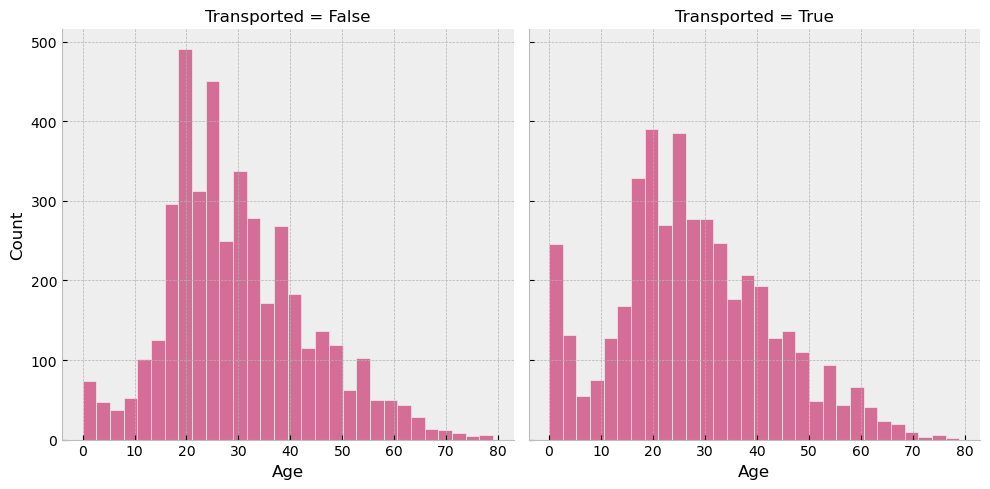

[372]


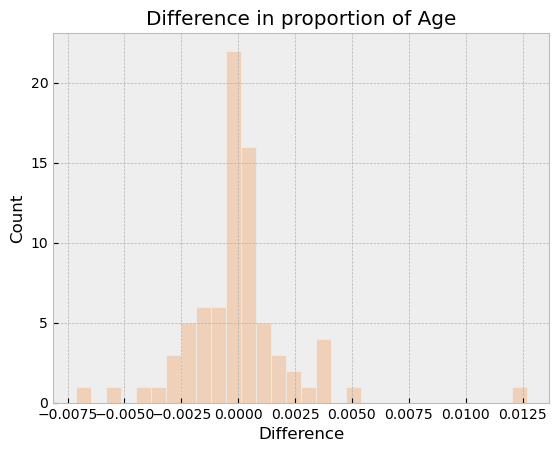

,24.0,18.0,21.0,19.0,23.0,22.0,20.0,26.0,28.0,27.0,25.0,29.0,31.0,32.0,30.0,33.0,36.0,0.0,37.0,35.0,38.0,17.0,15.0,34.0,16.0,13.0,39.0,14.0,41.0,43.0,40.0,42.0,44.0,46.0,45.0,47.0,49.0,2.0,3.0,50.0,48.0,4.0,55.0,1.0,54.0,53.0,51.0,7.0,52.0,56.0,58.0,11.0,8.0,57.0,9.0,12.0,6.0,10.0,59.0,60.0,5.0,61.0,64.0,62.0,63.0,65.0,67.0,68.0,70.0,66.0,73.0,71.0,69.0,74.0,75.0,72.0,78.0,79.0,76.0,77.0
% Age Start,0.038055,0.037585,0.036528,0.034414,0.034296,0.034179,0.032535,0.031478,0.031360,0.030420,0.028541,0.027014,0.023726,0.023373,0.021494,0.020907,0.020907,0.020907,0.020789,0.020085,0.018910,0.018558,0.018205,0.017383,0.017266,0.016561,0.016209,0.016209,0.015152,0.015034,0.015034,0.013977,0.013507,0.011393,0.010453,0.010336,0.009749,0.008809,0.008809,0.008692,0.008457,0.008339,0.007987,0.007869,0.007869,0.007165,0.006930,0.006108,0.006108,0.005638,0.005520,0.005520,0.005403,0.005403,0.004933,0.004816,0.004698,0.004581,0.004111,0.003993,0.003876,0.003759,0.003406,0.003054,0.003054,0.002701,0.001527,0.001409,0.001057,0.000822,0.000822,0.000822,0.000705,0.000587,0.000470,0.000470,0.000352,0.000352,0.000235,0.000235
% Age Transp,0.032649,0.037313,0.029384,0.032183,0.031950,0.031017,0.029384,0.029851,0.034981,0.029618,0.027285,0.026119,0.019356,0.020289,0.019123,0.019356,0.020756,0.033582,0.017257,0.020522,0.016558,0.020756,0.021222,0.017957,0.018657,0.016791,0.014459,0.017957,0.015625,0.015159,0.017024,0.012360,0.014692,0.011194,0.009795,0.010961,0.007929,0.012360,0.013759,0.008629,0.009095,0.012360,0.007463,0.011427,0.007463,0.006996,0.004897,0.007463,0.006530,0.005131,0.005597,0.006297,0.006063,0.005131,0.005597,0.006763,0.005364,0.005830,0.006297,0.003498,0.004664,0.004198,0.003731,0.003032,0.002332,0.001632,0.001632,0.001866,0.001399,0.000933,0.000233,0.000700,0.000233,0.000700,0.000466,0.000466,0.000233,NaN,0.000233,0.000233
Difference,-0.005406,-0.000272,-0.007144,-0.002231,-0.002347,-0.003162,-0.003150,-0.001627,0.003621,-0.000803,-0.001256,-0.000895,-0.004369,-0.003084,-0.002371,-0.001550,-0.000151,0.012675,-0.003532,0.000438,-0.002352,0.002198,0.003017,0.000574,0.001391,0.000230,-0.001750,0.001748,0.000473,0.000125,0.001990,-0.001617,0.001185,-0.000199,-0.000659,0.000625,-0.001820,0.003551,0.004950,-0.000063,0.000638,0.004021,-0.000524,0.003558,-0.000407,-0.000168,-0.002032,0.001355,0.000422,-0.000507,0.000077,0.000776,0.000661,-0.000272,0.000664,0.001947,0.000666,0.001250,0.002186,-0.000495,0.000788,0.000439,0.000325,-0.000022,-0.000722,-0.001069,0.000106,0.000456,0.000342,0.000111,-0.000589,-0.000123,-0.000472,0.000112,-0.000003,-0.000003,-0.000119,NaN,-0.000002,-0.000002


In [37]:
pd.set_option('display.max_columns', 1000)
dis_plot(train_set,'Age')

Observations: 
<li>Number of children age 0 show drastic difference in the proportion of Transported
<li>Children 1-4 slight increase in proportion of Transported
<li>over the Age 60 shows no difference in the proportion of Transported. <b>Dimension reduction</b> 

## RoomService and Transported

[175]


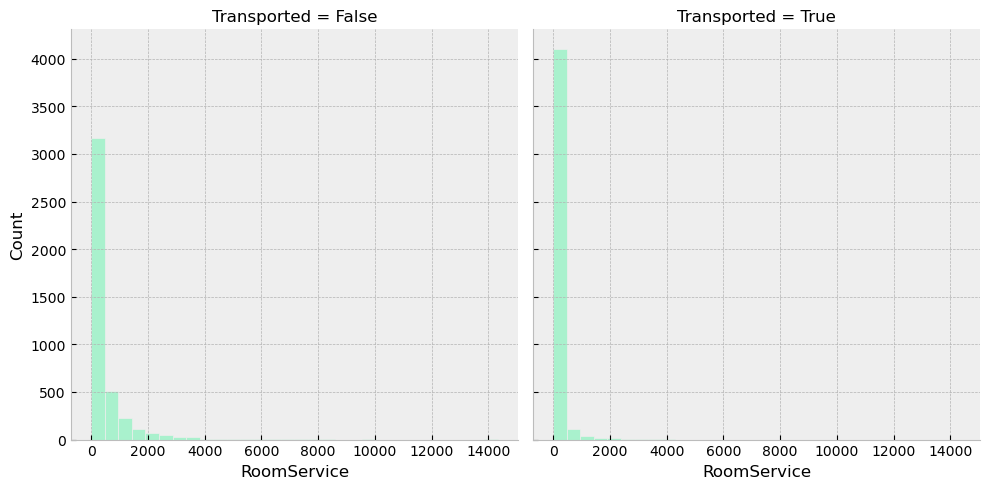

[84]


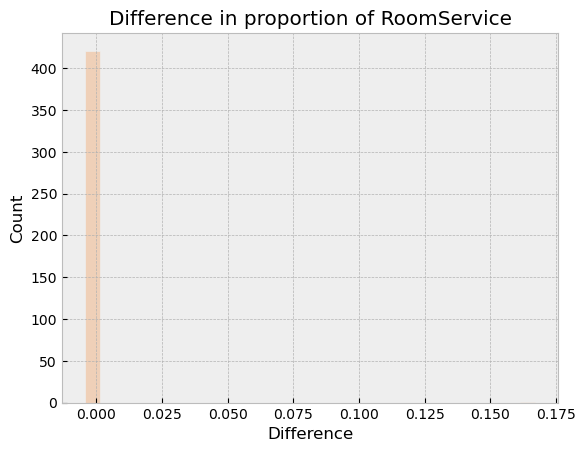

,0.0,1.0,2.0,3.0,4.0,5.0,9.0,8.0,6.0,14.0,13.0,10.0,7.0,19.0,12.0,21.0,11.0,30.0,22.0,20.0,42.0,27.0,18.0,28.0,32.0,16.0,31.0,15.0,17.0,36.0,90.0,43.0,24.0,25.0,29.0,112.0,39.0,49.0,38.0,44.0,84.0,35.0,83.0,86.0,34.0,26.0,37.0,158.0,89.0,41.0,48.0,324.0,46.0,45.0,65.0,40.0,59.0,139.0,56.0,23.0,77.0,55.0,51.0,33.0,552.0,172.0,98.0,142.0,381.0,412.0,118.0,61.0,558.0,63.0,105.0,85.0,590.0,121.0,149.0,120.0,62.0,406.0,102.0,76.0,64.0,71.0,47.0,52.0,126.0,781.0,457.0,1144.0,258.0,174.0,164.0,751.0,183.0,103.0,309.0,125.0,145.0,130.0,886.0,758.0,127.0,227.0,828.0,128.0,104.0,58.0,78.0,426.0,1146.0,717.0,244.0,546.0,270.0,114.0,485.0,1228.0,506.0,193.0,542.0,106.0,437.0,233.0,490.0,173.0,715.0,60.0,610.0,600.0,354.0,286.0,733.0,68.0,553.0,200.0,399.0,160.0,50.0,358.0,148.0,588.0,520.0,691.0,82.0,382.0,866.0,688.0,181.0,122.0,69.0,513.0,256.0,948.0,479.0,253.0,223.0,396.0,135.0,1365.0,621.0,245.0,523.0,418.0,66.0,154.0,737.0,301.0,593.0,528.0,202.0,180.0,511.0,131.0,313.0,454.0,330.0,915.0,1215.0,508.0,328.0,74.0,571.0,664.0,151.0,574.0,218.0,123.0,676.0,311.0,194.0,773.0,880.0,190.0,143.0,725.0,95.0,388.0,470.0,1946.0,1054.0,554.0,721.0,784.0,235.0,401.0,214.0,196.0,1042.0,852.0,1744.0,360.0,526.0,368.0,97.0,1006.0,54.0,81.0,163.0,1030.0,938.0,995.0,804.0,433.0,305.0,2502.0,166.0,414.0,1150.0,345.0,714.0,108.0,1192.0,113.0,809.0,836.0,210.0,697.0,247.0,628.0,530.0,695.0,949.0,559.0,521.0,801.0,786.0,439.0,815.0,380.0,550.0,116.0,460.0,698.0,332.0,198.0,269.0,348.0,748.0,857.0,712.0,505.0,635.0,735.0,821.0,355.0,379.0,386.0,850.0,661.0,631.0,1331.0,666.0,72.0,176.0,1377.0,1471.0,80.0,1058.0,1751.0,458.0,2044.0,834.0,750.0,802.0,1722.0,654.0,583.0,771.0,246.0,1663.0,238.0,153.0,232.0,1157.0,1417.0,400.0,91.0,639.0,598.0,1961.0,289.0,803.0,699.0,115.0,1258.0,1092.0,87.0,770.0,1339.0,602.0,171.0,616.0,93.0,203.0,988.0,1696.0,75.0,1242.0,862.0,579.0,473.0,607.0,169.0,501.0,623.0,241.0,1367.0,156.0,724.0,197.0,267.0,469.0,362.0,854.0,768.0,2703.0,1610.0,736.0,753.0,647.0,749.0,1290.0,228.0,261.0,101.0,397.0,595.0,290.0,132.0,1399.0,201.0,907.0,799.0,1060.0,293.0,1046.0,1364.0,179.0,679.0,312.0,1269.0,207.0,1007.0,761.0,690.0,741.0,239.0,514.0,88.0,1037.0,2048.0,576.0,1442.0,766.0,94.0,477.0,467.0,124.0,686.0,274.0,503.0,2267.0,1231.0,2532.0,824.0,718.0,622.0,657.0,300.0,760.0,57.0,423.0,2904.0,665.0,2575.0,357.0,672.0,653.0,165.0,410.0,134.0,944.0,625.0,456.0,294.0,1049.0,810.0,1309.0,1178.0,141.0,947.0,339.0,3478.0,819.0,1086.0,912.0,578.0,577.0,814.0,994.0,395.0,185.0,1781.0,728.0,248.0,390.0,178.0,138.0,627.0,1410.0,336.0,649.0,325.0,489.0,110.0,435.0,1337.0,891.0,415.0,641.0,417.0,204.0,443.0,1018.0,1369.0,432.0,612.0,954.0,522.0,636.0,146.0,1577.0,876.0,482.0,702.0,272.0,1172.0,787.0,637.0,487.0,556.0,694.0,79.0,285.0,159.0,320.0,341.0,434.0,224.0,1252.0,1246.0,1507.0,928.0,338.0,705.0,70.0,53.0,757.0,213.0,711.0,806.0,356.0,2484.0,206.0,555.0,640.0,629.0,319.0,614.0,1277.0,177.0,1770.0,765.0,539.0,237.0,1264.0,1227.0,...,1132.0,1379.0,4397.0,605.0,3564.0,1282.0,209.0,644.0,831.0,1842.0,1119.0,2686.0,1544.0,812.0,1156.0,1222.0,668.0,916.0,551.0,3809.0,236.0,1682.0,838.0,499.0,3811.0,8142.0,1883.0,3215.0,448.0,3090.0,441.0,1214.0,462.0,963.0,1208.0,276.0,2956.0,1403.0,532.0,1017.0,982.0,1852.0,2042.0,67.0,805.0,419.0,2026.0,2006.0,425.0,1823.0,1884.0,535.0,2223.0,1333.0,769.0,1720.0,1199.0,1405.0,416.0,1960.0,1730.0,858.0,2647.0,431.0,5888.0,365.0,1000.0,1533.0,1233.0,1095.0,634.0,1969.0,99.0,1603.0,376.0,868.0,199.0,1811.0,580.0,589.0,2189.0,630.0,2031.0,3030.0,1432.0,472.0,1669.0,3616.0,898.0,569.0,6256.0,484.0,1216.0,2646.0,1120.0,2210.0,428.0,1158.0,825.0,295.0,1300.0,3202.0,2436.0,1481.0,3482.0,1112.0,1313.0,596.0,1554.0,813.0,1279.0,1336.0,762.0,587.0,742.0,2400.0,3677.0,2973.0,333.0,5022.0,7172.0,1015.0,1489.0,491.0,1535.0,965.0,591.0,926.0,189.0,1088.0,2058.0,1656.0,259.0,1381.0,2988.0,894.0,92.0,1890.0,1114.0,398.0,1240.0,1226.0,3992.0,1220.0,4694.0,775.0,212.0,430.0,6726.0,2300.0,216.0,1624.0,776.0,860.0,624.0,2138.0,651.0,17

In [38]:
dis_plot(train_set, "RoomService")

Observations: 
<li>Those that didn't use RoomService show a 16% greater chance of being transported.</li>
<li> No affect for any amount of RoomService usage - <b>Dimension Reduction</b>

## FoodCourt and Transported

[241]


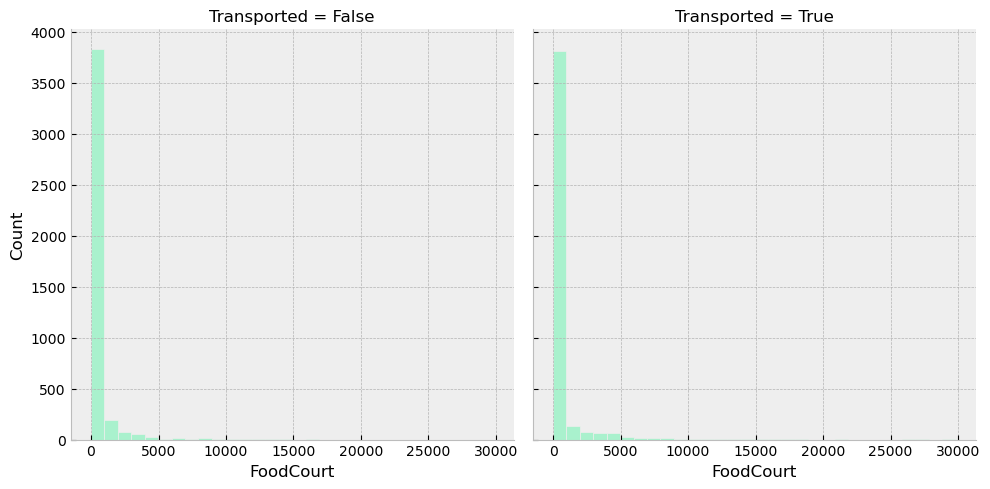

[286]


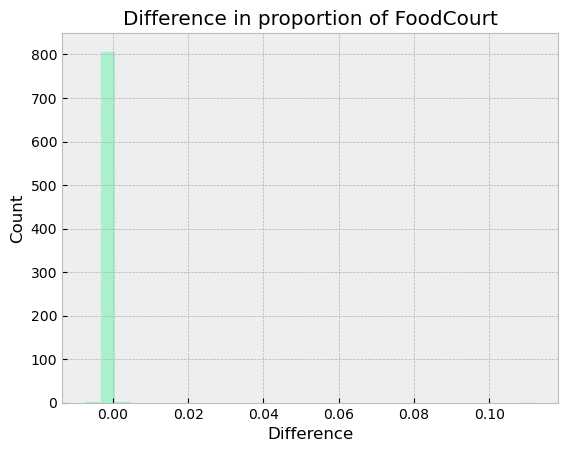

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,7.0,10.0,8.0,11.0,25.0,20.0,16.0,21.0,13.0,22.0,12.0,33.0,18.0,30.0,17.0,53.0,15.0,44.0,31.0,14.0,32.0,29.0,79.0,43.0,34.0,56.0,83.0,38.0,37.0,59.0,19.0,46.0,36.0,82.0,28.0,104.0,35.0,84.0,51.0,132.0,243.0,809.0,76.0,24.0,89.0,122.0,225.0,40.0,760.0,94.0,172.0,93.0,27.0,45.0,162.0,169.0,60.0,103.0,47.0,100.0,179.0,226.0,39.0,55.0,166.0,717.0,42.0,316.0,68.0,194.0,142.0,896.0,201.0,784.0,124.0,23.0,1125.0,131.0,26.0,841.0,266.0,368.0,170.0,847.0,490.0,160.0,138.0,41.0,280.0,95.0,600.0,48.0,61.0,509.0,654.0,559.0,52.0,180.0,90.0,605.0,86.0,335.0,592.0,49.0,153.0,57.0,80.0,218.0,281.0,63.0,785.0,114.0,65.0,157.0,412.0,70.0,71.0,779.0,116.0,810.0,175.0,584.0,395.0,196.0,50.0,510.0,493.0,496.0,69.0,669.0,794.0,58.0,125.0,268.0,688.0,653.0,564.0,1049.0,479.0,173.0,741.0,700.0,306.0,314.0,716.0,64.0,914.0,537.0,109.0,355.0,282.0,222.0,106.0,87.0,756.0,574.0,54.0,108.0,338.0,275.0,640.0,780.0,652.0,382.0,722.0,910.0,297.0,75.0,302.0,236.0,140.0,126.0,62.0,782.0,641.0,168.0,247.0,279.0,442.0,704.0,690.0,313.0,184.0,257.0,397.0,216.0,1376.0,77.0,878.0,817.0,193.0,666.0,110.0,588.0,96.0,714.0,420.0,1026.0,213.0,97.0,212.0,195.0,1283.0,113.0,1208.0,165.0,334.0,235.0,219.0,790.0,773.0,747.0,123.0,317.0,918.0,230.0,287.0,185.0,2127.0,846.0,489.0,608.0,326.0,692.0,699.0,664.0,545.0,98.0,3578.0,511.0,465.0,1725.0,802.0,1489.0,2318.0,440.0,1706.0,583.0,630.0,128.0,2344.0,88.0,118.0,748.0,1620.0,354.0,1369.0,111.0,476.0,532.0,594.0,852.0,787.0,554.0,244.0,129.0,764.0,177.0,217.0,1234.0,837.0,265.0,91.0,336.0,807.0,120.0,702.0,67.0,726.0,2052.0,763.0,865.0,867.0,639.0,869.0,150.0,198.0,548.0,753.0,158.0,81.0,444.0,144.0,858.0,478.0,3750.0,927.0,602.0,392.0,303.0,156.0,985.0,746.0,147.0,544.0,667.0,1198.0,676.0,4715.0,4387.0,176.0,418.0,632.0,416.0,329.0,1828.0,587.0,723.0,433.0,557.0,1186.0,775.0,974.0,552.0,117.0,434.0,677.0,400.0,454.0,5974.0,960.0,610.0,651.0,540.0,804.0,614.0,267.0,839.0,73.0,398.0,5063.0,286.0,1211.0,499.0,680.0,261.0,925.0,586.0,419.0,85.0,1080.0,1794.0,2972.0,1347.0,831.0,361.0,597.0,1284.0,1381.0,134.0,1108.0,1180.0,121.0,421.0,1068.0,396.0,3585.0,220.0,215.0,456.0,1674.0,593.0,171.0,4451.0,590.0,824.0,242.0,3571.0,439.0,477.0,558.0,670.0,788.0,1249.0,1736.0,269.0,139.0,551.0,4313.0,463.0,888.0,728.0,453.0,492.0,905.0,1311.0,366.0,1001.0,1337.0,152.0,516.0,130.0,415.0,178.0,695.0,1390.0,388.0,192.0,854.0,4224.0,686.0,1111.0,1451.0,370.0,823.0,164.0,321.0,596.0,1127.0,323.0,791.0,679.0,350.0,530.0,541.0,3488.0,483.0,237.0,819.0,631.0,188.0,1328.0,371.0,889.0,776.0,1095.0,143.0,1339.0,2804.0,402.0,725.0,709.0,1487.0,2506.0,271.0,525.0,78.0,565.0,806.0,3863.0,2337.0,774.0,4017.0,360.0,13561.0,358.0,145.0,769.0,1028.0,377.0,251.0,484.0,952.0,233.0,1119.0,186.0,254.0,3603.0,427.0,745.0,495.0,307.0,410.0,494.0,1855.0,1269.0,406.0,231.0,656.0,284.0,757.0,2390.0,146.0,224.0,950.0,1307.0,293.0,1428.0,258.0,102.0,210.0,697.0,115.0,642.0,378.0,850.0,611.0,761.0,486.0,996.0,706.0,687.0,...,1109.0,1179.0,1670.0,3166.0,8037.0,21066.0,3584.0,1310.0,3240.0,3368.0,1170.0,603.0,11026.0,7255.0,3722.0,2334.0,811.0,1333.0,6398.0,8882.0,4424.0,127.0,1218.0,13527.0,710.0,3441.0,11003.0,1983.0,16263.0,10153.0,1810.0,2043.0,4286.0,877.0,5728.0,1368.0,3341.0,2876.0,12809.0,1949.0,3024.0,8150.0,148.0,1281.0,1471.0,604.0,228.0,815.0,2174.0,3053.0,1136.0,1554.0,1297.0,7116.0,1514.0,487.0,2684.0,617.0,1650.0,1776.0,2373.0,5876.0,1115.0,1772.0,1721.0,1195.0,320.0,933.0,1124.0,1912.0,1064.0,1482.0,349.0,3381.0,4651.0,12077.0,428.0,2426.0,2012.0,2210.0,4106.0,2628.0,1223.0,5412.0,409.0,8926.0,4756.0,422.0,5553.0,6500.0,2115.0,1829.0,223.0,4458.0,738.0,2762.0,2467.0,8759.0,2144.0,5407.0,646.0,808.0,1563.0,2077.0,4967.0,3011.0,576.0,1755.0,5225.0,5212.0,863.0,799.0,2987.0,11330.0,1291.0,1847.0,7201.0,333.0,3564.0,1356.0,10116.0,575.0,4227.0,3344.0,1116.0,5473.0,1778.0,393.0,1496.0,4677.0,3113.0,3385.0,3628.0,3106.0,27723.0,4076.0,6138.0,3262.0,447.0,3004.0,12180.0,3879.0,561.0,701.0,1344.0,2956.0,473.0,3425.0,12804.0,835.0

In [39]:
dis_plot(train_set, 'FoodCourt')

Observations: 
<li>Those that didn't use FoodCourt show a 11% greater chance of being transported.</li>
<li> No affect for any amount of FoodCourt usage - <b>Dimension Reduction</b>

## ShoppingMall and Transported

[376]


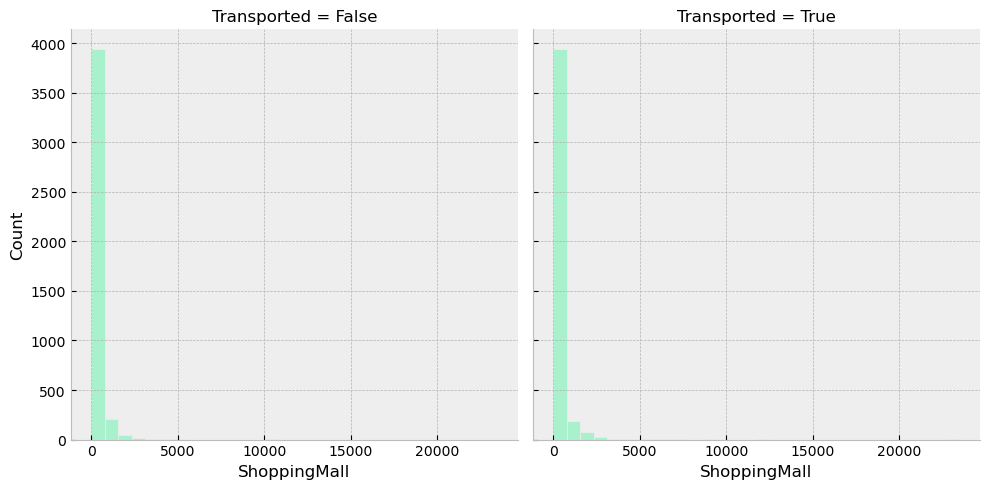

[492]


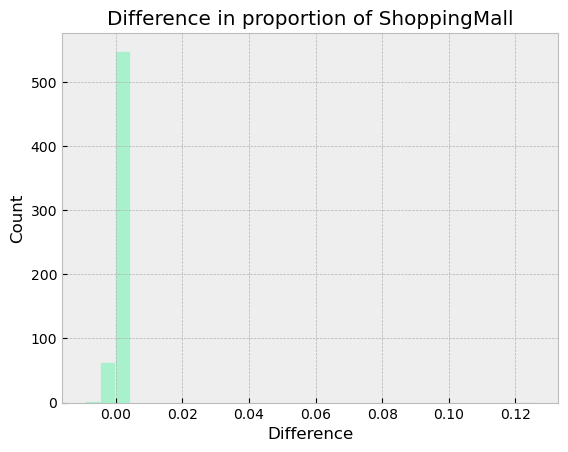

,0.0,1.0,2.0,3.0,4.0,5.0,7.0,6.0,13.0,9.0,8.0,10.0,23.0,11.0,31.0,17.0,12.0,14.0,15.0,22.0,16.0,32.0,46.0,18.0,21.0,20.0,51.0,47.0,19.0,26.0,29.0,33.0,30.0,25.0,49.0,50.0,28.0,38.0,36.0,80.0,81.0,60.0,40.0,97.0,39.0,82.0,54.0,34.0,37.0,53.0,43.0,136.0,52.0,137.0,27.0,84.0,71.0,74.0,95.0,45.0,44.0,89.0,41.0,61.0,72.0,310.0,99.0,110.0,863.0,591.0,62.0,106.0,101.0,115.0,182.0,455.0,870.0,638.0,501.0,109.0,761.0,496.0,128.0,830.0,208.0,66.0,687.0,661.0,533.0,301.0,24.0,77.0,73.0,87.0,48.0,88.0,116.0,55.0,908.0,158.0,213.0,91.0,444.0,285.0,222.0,657.0,185.0,754.0,414.0,64.0,92.0,381.0,450.0,234.0,736.0,193.0,57.0,885.0,163.0,280.0,291.0,896.0,717.0,800.0,654.0,693.0,363.0,756.0,56.0,133.0,83.0,150.0,117.0,206.0,68.0,615.0,58.0,267.0,880.0,59.0,35.0,690.0,1435.0,699.0,157.0,332.0,670.0,336.0,126.0,622.0,713.0,796.0,356.0,859.0,795.0,719.0,103.0,977.0,143.0,408.0,599.0,592.0,243.0,265.0,895.0,341.0,172.0,422.0,238.0,744.0,377.0,228.0,481.0,827.0,195.0,424.0,477.0,76.0,202.0,926.0,600.0,242.0,114.0,594.0,75.0,681.0,232.0,246.0,675.0,149.0,292.0,340.0,260.0,273.0,146.0,849.0,78.0,130.0,180.0,94.0,139.0,659.0,802.0,249.0,388.0,295.0,801.0,65.0,70.0,1127.0,589.0,456.0,671.0,148.0,127.0,307.0,516.0,660.0,142.0,867.0,618.0,155.0,161.0,210.0,132.0,1081.0,429.0,111.0,809.0,135.0,635.0,348.0,957.0,617.0,874.0,323.0,479.0,552.0,100.0,257.0,722.0,559.0,580.0,102.0,708.0,129.0,321.0,715.0,469.0,170.0,311.0,973.0,134.0,840.0,991.0,868.0,642.0,612.0,42.0,834.0,298.0,404.0,616.0,297.0,689.0,343.0,144.0,85.0,453.0,63.0,1185.0,192.0,366.0,1540.0,441.0,910.0,610.0,174.0,575.0,113.0,442.0,873.0,779.0,545.0,858.0,409.0,945.0,437.0,655.0,270.0,271.0,970.0,1967.0,1083.0,648.0,576.0,851.0,626.0,791.0,169.0,217.0,1224.0,743.0,465.0,470.0,171.0,392.0,921.0,164.0,857.0,492.0,792.0,380.0,198.0,138.0,631.0,96.0,471.0,782.0,159.0,175.0,525.0,2080.0,1025.0,79.0,272.0,346.0,262.0,476.0,947.0,235.0,165.0,131.0,1769.0,354.0,223.0,637.0,125.0,889.0,980.0,505.0,335.0,531.0,378.0,360.0,123.0,276.0,640.0,586.0,662.0,508.0,725.0,542.0,1020.0,805.0,553.0,623.0,813.0,1105.0,927.0,166.0,215.0,1110.0,227.0,1564.0,643.0,1376.0,459.0,835.0,299.0,183.0,236.0,1080.0,167.0,726.0,653.0,669.0,700.0,664.0,608.0,214.0,379.0,394.0,364.0,478.0,486.0,353.0,808.0,194.0,418.0,778.0,400.0,181.0,415.0,848.0,898.0,703.0,269.0,186.0,191.0,790.0,327.0,846.0,1761.0,358.0,902.0,584.0,738.0,288.0,3700.0,402.0,1865.0,490.0,201.0,98.0,397.0,345.0,151.0,446.0,107.0,122.0,730.0,783.0,704.0,831.0,69.0,1128.0,331.0,601.0,322.0,229.0,209.0,784.0,555.0,876.0,959.0,499.0,124.0,211.0,118.0,197.0,1359.0,454.0,93.0,634.0,569.0,119.0,718.0,551.0,716.0,561.0,787.0,747.0,884.0,694.0,287.0,1061.0,188.0,967.0,325.0,187.0,338.0,497.0,145.0,372.0,362.0,1404.0,665.0,1632.0,320.0,387.0,619.0,739.0,147.0,1116.0,384.0,1134.0,121.0,714.0,482.0,750.0,677.0,289.0,352.0,881.0,817.0,548.0,544.0,841.0,1310.0,1313.0,2366.0,1167.0,641.0,306.0,1048.0,403.0,1326.0,1657.0,534.0,...,254.0,1501.0,7810.0,649.0,1301.0,602.0,1792.0,566.0,546.0,1641.0,1536.0,1123.0,6331.0,2036.0,729.0,278.0,290.0,396.0,1785.0,797.0,6221.0,1908.0,1364.0,277.0,1929.0,1169.0,1411.0,349.0,644.0,3958.0,447.0,10705.0,604.0,624.0,686.0,960.0,2267.0,342.0,2778.0,1629.0,2566.0,1130.0,460.0,1008.0,233.0,1729.0,928.0,304.0,1296.0,1970.0,204.0,1357.0,1072.0,1069.0,758.0,1353.0,184.0,684.0,23492.0,807.0,483.0,1338.0,668.0,918.0,205.0,1085.0,510.0,816.0,563.0,308.0,855.0,220.0,2370.0,1063.0,371.0,707.0,1401.0,613.0,286.0,1363.0,4407.0,628.0,200.0,412.0,7148.0,620.0,120.0,1598.0,1291.0,419.0,1750.0,692.0,1018.0,1295.0,1164.0,1015.0,1583.0,1041.0,177.0,2090.0,1232.0,682.0,901.0,1690.0,1211.0,2330.0,1642.0,105.0,844.0,1911.0,3374.0,1660.0,860.0,239.0,2398.0,1147.0,512.0,1119.0,2614.0,140.0,526.0,1373.0,696.0,1472.0,909.0,1898.0,2383.0,1000.0,2010.0,1548.0,1236.0,4058.0,1179.0,4761.0,651.0,793.0,658.0,1104.0,702.0,1468.0,416.0,572.0,1826.0,432.0,1309.0,2228.0,773.0,1288.0,1938.0,728.0,4127.0,305.0,2621.0,1880.0,1912.0,1121.0,425.0,2956.0,386.0,944.0,766.0,879.0,179.0,10

In [40]:
dis_plot(train_set, 'ShoppingMall')

Observations: 
<li>Those that didn't use ShoppingMall show a 12,6% greater chance of being transported.</li>
<li> People who spent more than a 100 in ShoppingMall - <b>Dimension Reduction</b>

## Spa and Transported

[114]


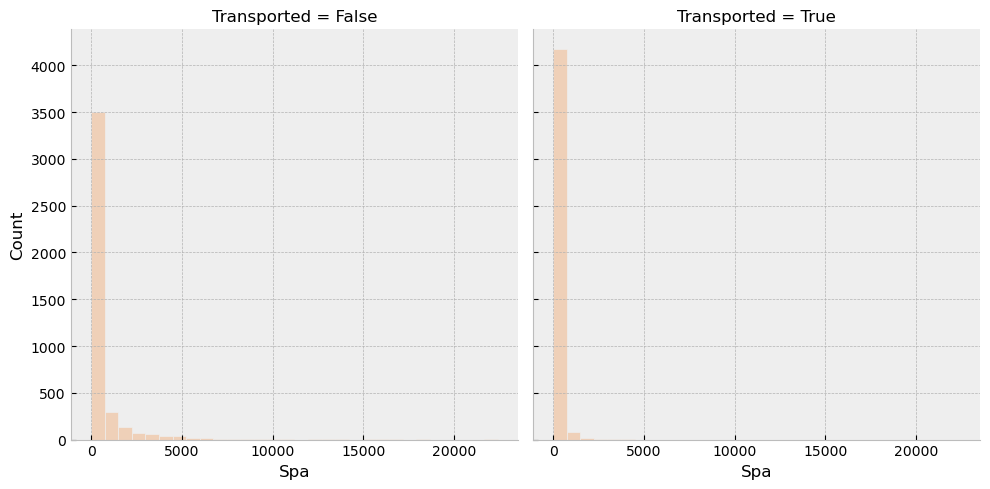

[275]


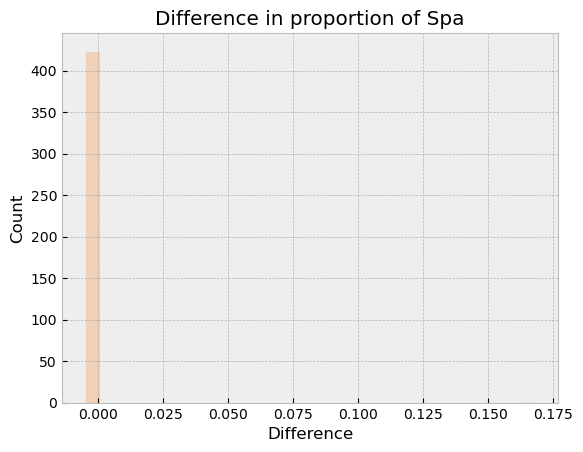

,0.0,1.0,2.0,5.0,3.0,4.0,7.0,6.0,9.0,8.0,10.0,12.0,11.0,20.0,15.0,16.0,22.0,14.0,19.0,13.0,17.0,59.0,21.0,26.0,38.0,31.0,36.0,30.0,49.0,18.0,43.0,87.0,27.0,25.0,40.0,148.0,62.0,24.0,56.0,33.0,48.0,35.0,29.0,39.0,58.0,51.0,71.0,34.0,102.0,104.0,318.0,42.0,52.0,117.0,140.0,68.0,50.0,41.0,74.0,304.0,61.0,80.0,32.0,37.0,136.0,110.0,85.0,45.0,594.0,280.0,44.0,46.0,28.0,55.0,795.0,112.0,54.0,207.0,94.0,131.0,118.0,202.0,266.0,89.0,352.0,580.0,115.0,77.0,23.0,184.0,146.0,161.0,732.0,65.0,101.0,91.0,103.0,166.0,107.0,128.0,195.0,78.0,153.0,588.0,135.0,182.0,170.0,124.0,641.0,201.0,72.0,177.0,150.0,180.0,73.0,258.0,359.0,484.0,669.0,544.0,267.0,183.0,660.0,360.0,676.0,139.0,79.0,121.0,297.0,241.0,703.0,690.0,277.0,63.0,160.0,232.0,88.0,109.0,245.0,125.0,97.0,724.0,226.0,47.0,95.0,564.0,436.0,788.0,712.0,274.0,283.0,123.0,888.0,204.0,92.0,646.0,324.0,83.0,733.0,259.0,1125.0,393.0,625.0,677.0,295.0,419.0,739.0,685.0,254.0,671.0,720.0,1026.0,167.0,67.0,130.0,176.0,76.0,673.0,572.0,142.0,570.0,394.0,253.0,320.0,679.0,639.0,190.0,920.0,244.0,717.0,64.0,298.0,96.0,291.0,380.0,425.0,347.0,60.0,229.0,208.0,726.0,692.0,178.0,250.0,356.0,179.0,785.0,53.0,560.0,214.0,187.0,435.0,369.0,778.0,698.0,299.0,213.0,662.0,467.0,897.0,157.0,797.0,287.0,716.0,857.0,768.0,506.0,144.0,525.0,210.0,471.0,699.0,401.0,568.0,881.0,66.0,670.0,105.0,174.0,696.0,57.0,725.0,84.0,445.0,557.0,786.0,769.0,246.0,239.0,108.0,86.0,173.0,424.0,93.0,334.0,659.0,310.0,595.0,1149.0,1545.0,1234.0,454.0,211.0,3725.0,1415.0,481.0,863.0,75.0,565.0,1249.0,81.0,758.0,713.0,1313.0,663.0,168.0,599.0,686.0,1589.0,2085.0,4996.0,132.0,602.0,368.0,750.0,808.0,256.0,90.0,1367.0,492.0,559.0,263.0,335.0,453.0,120.0,650.0,668.0,702.0,864.0,5577.0,194.0,409.0,839.0,285.0,219.0,495.0,1043.0,278.0,1777.0,292.0,69.0,407.0,740.0,113.0,129.0,134.0,209.0,912.0,289.0,288.0,734.0,206.0,514.0,843.0,593.0,1254.0,196.0,665.0,224.0,967.0,240.0,613.0,353.0,711.0,664.0,672.0,704.0,654.0,1866.0,1483.0,1600.0,558.0,344.0,434.0,3409.0,158.0,474.0,372.0,1014.0,620.0,228.0,301.0,814.0,1795.0,305.0,1831.0,200.0,635.0,601.0,746.0,480.0,70.0,2205.0,122.0,198.0,549.0,528.0,100.0,265.0,127.0,589.0,756.0,498.0,325.0,642.0,227.0,223.0,678.0,820.0,1497.0,450.0,607.0,308.0,700.0,270.0,614.0,217.0,300.0,548.0,414.0,617.0,1529.0,312.0,545.0,847.0,1677.0,439.0,1098.0,1250.0,658.0,604.0,1465.0,755.0,370.0,2287.0,328.0,519.0,465.0,508.0,111.0,143.0,1679.0,379.0,812.0,327.0,106.0,2279.0,149.0,156.0,126.0,567.0,221.0,747.0,286.0,616.0,2143.0,745.0,830.0,307.0,618.0,774.0,205.0,152.0,542.0,722.0,203.0,98.0,622.0,773.0,1022.0,175.0,199.0,787.0,562.0,5467.0,236.0,1537.0,898.0,951.0,408.0,1966.0,316.0,675.0,458.0,1018.0,460.0,119.0,3198.0,1010.0,719.0,422.0,854.0,154.0,489.0,442.0,284.0,133.0,759.0,764.0,762.0,541.0,2121.0,252.0,681.0,371.0,417.0,323.0,782.0,1438.0,629.0,638.0,838.0,441.0,611.0,499.0,279.0,309.0,363.0,1806.0,145.0,4476.0,554.0,162.0,234.0,754.0,731.0,981.0,886.0,824.0,584.0,...,231.0,1380.0,343.0,829.0,2274.0,1877.0,1530.0,4864.0,3452.0,4236.0,1548.0,171.0,1733.0,2814.0,4094.0,3528.0,4232.0,13117.0,4794.0,2134.0,684.0,2585.0,938.0,867.0,928.0,421.0,8330.0,3803.0,5481.0,446.0,661.0,4928.0,2441.0,804.0,5697.0,1538.0,2618.0,2868.0,444.0,561.0,1525.0,8522.0,2395.0,900.0,751.0,1847.0,5015.0,1701.0,800.0,455.0,181.0,1611.0,1239.0,521.0,3761.0,691.0,1052.0,718.0,889.0,1910.0,1490.0,3786.0,6616.0,2787.0,486.0,793.0,15331.0,6200.0,825.0,2421.0,1208.0,376.0,2204.0,4102.0,1282.0,735.0,728.0,1528.0,5037.0,1431.0,1095.0,1339.0,1200.0,375.0,2448.0,3175.0,631.0,496.0,1080.0,6704.0,1306.0,2136.0,905.0,2735.0,260.0,151.0,4170.0,1520.0,760.0,3208.0,6255.0,4060.0,16594.0,4422.0,813.0,3998.0,817.0,6431.0,1440.0,3718.0,2987.0,723.0,2681.0,1435.0,515.0,2113.0,771.0,1739.0,2549.0,836.0,892.0,1452.0,605.0,1418.0,215.0,644.0,7818.0,1324.0,877.0,2650.0,3133.0,566.0,326.0,448.0,543.0,3573.0,1064.0,11001.0,381.0,2788.0,656.0,1555.0,1899.0,1402.0,4085.0,9124.0,4463.0,3028.0,3615.0,4759.0,6202.0,710.0,1266.0,2624.0,4926.0,13036.0,868.0,550.0,84

In [41]:
dis_plot(train_set, 'Spa')

Observations: 
<li>Not going to the Spa represented a 16% more chance of being transported.

## VRDeck and Transported

[46]


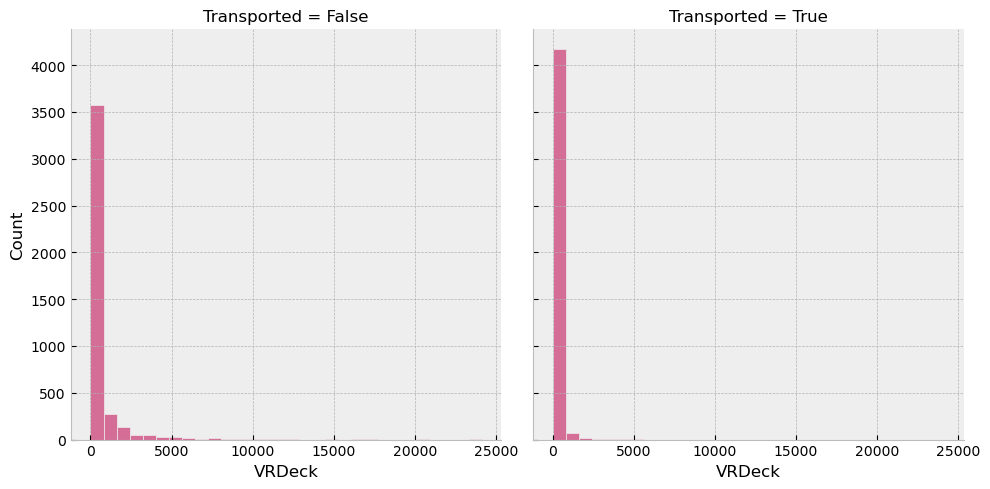

[372]


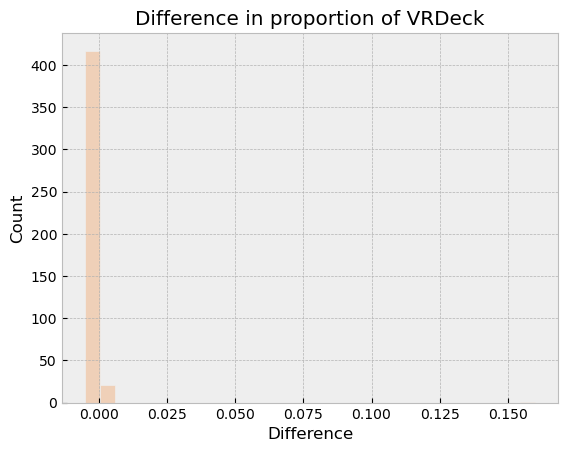

,0.0,1.0,2.0,3.0,5.0,4.0,6.0,8.0,7.0,9.0,12.0,10.0,13.0,16.0,23.0,11.0,15.0,19.0,18.0,17.0,25.0,26.0,40.0,21.0,14.0,22.0,44.0,27.0,52.0,20.0,77.0,39.0,67.0,57.0,24.0,30.0,29.0,41.0,32.0,62.0,61.0,86.0,85.0,31.0,55.0,74.0,124.0,50.0,100.0,79.0,35.0,68.0,34.0,64.0,89.0,60.0,53.0,42.0,119.0,37.0,46.0,754.0,47.0,28.0,71.0,54.0,43.0,72.0,33.0,84.0,168.0,36.0,341.0,213.0,56.0,214.0,337.0,91.0,810.0,173.0,109.0,99.0,96.0,388.0,90.0,122.0,161.0,45.0,642.0,49.0,518.0,73.0,594.0,163.0,811.0,113.0,144.0,387.0,254.0,880.0,170.0,510.0,319.0,98.0,427.0,92.0,512.0,827.0,872.0,421.0,175.0,229.0,661.0,135.0,517.0,773.0,188.0,803.0,63.0,283.0,704.0,907.0,93.0,556.0,112.0,397.0,58.0,120.0,356.0,800.0,293.0,80.0,197.0,659.0,130.0,128.0,104.0,329.0,312.0,108.0,239.0,66.0,478.0,376.0,260.0,149.0,132.0,687.0,226.0,488.0,159.0,384.0,143.0,794.0,83.0,461.0,235.0,218.0,105.0,243.0,654.0,196.0,70.0,178.0,281.0,622.0,176.0,185.0,640.0,308.0,521.0,637.0,591.0,729.0,180.0,423.0,473.0,160.0,117.0,247.0,553.0,208.0,142.0,401.0,115.0,75.0,256.0,155.0,671.0,336.0,1393.0,150.0,78.0,236.0,701.0,693.0,59.0,533.0,1779.0,619.0,364.0,69.0,330.0,248.0,323.0,76.0,428.0,757.0,82.0,126.0,715.0,764.0,182.0,334.0,275.0,192.0,48.0,349.0,131.0,629.0,224.0,486.0,383.0,359.0,309.0,1674.0,445.0,223.0,140.0,368.0,171.0,137.0,567.0,575.0,489.0,1023.0,555.0,333.0,262.0,1370.0,125.0,101.0,402.0,394.0,88.0,404.0,498.0,321.0,731.0,766.0,904.0,103.0,506.0,199.0,595.0,587.0,373.0,673.0,110.0,444.0,900.0,774.0,240.0,632.0,490.0,452.0,375.0,1141.0,360.0,570.0,121.0,986.0,782.0,398.0,249.0,116.0,2577.0,307.0,475.0,378.0,181.0,647.0,779.0,588.0,469.0,228.0,813.0,1384.0,548.0,1539.0,1963.0,366.0,287.0,205.0,138.0,198.0,1082.0,502.0,583.0,571.0,284.0,1514.0,347.0,605.0,772.0,1225.0,145.0,565.0,667.0,1984.0,826.0,2141.0,267.0,549.0,625.0,746.0,633.0,484.0,483.0,1560.0,141.0,311.0,448.0,1320.0,179.0,468.0,136.0,372.0,436.0,139.0,3372.0,777.0,470.0,784.0,350.0,871.0,867.0,845.0,815.0,1244.0,266.0,1678.0,51.0,305.0,683.0,1548.0,2203.0,440.0,516.0,636.0,261.0,2260.0,672.0,537.0,896.0,707.0,681.0,1157.0,344.0,801.0,809.0,658.0,1919.0,177.0,551.0,340.0,487.0,624.0,558.0,118.0,186.0,1132.0,1257.0,582.0,418.0,700.0,500.0,621.0,920.0,2056.0,363.0,466.0,733.0,1318.0,2325.0,785.0,909.0,692.0,107.0,542.0,1148.0,676.0,158.0,1804.0,1435.0,290.0,437.0,276.0,1014.0,320.0,776.0,102.0,769.0,270.0,191.0,2054.0,677.0,1116.0,1462.0,2376.0,698.0,209.0,791.0,156.0,146.0,706.0,739.0,4987.0,705.0,201.0,878.0,443.0,81.0,162.0,1226.0,289.0,1042.0,1179.0,634.0,793.0,912.0,1460.0,462.0,820.0,200.0,653.0,697.0,584.0,514.0,1241.0,623.0,792.0,1147.0,761.0,230.0,417.0,748.0,299.0,1057.0,539.0,908.0,943.0,756.0,719.0,515.0,781.0,832.0,843.0,455.0,607.0,788.0,1300.0,342.0,807.0,253.0,1063.0,638.0,335.0,127.0,1955.0,187.0,855.0,151.0,1229.0,482.0,493.0,1166.0,663.0,453.0,318.0,38.0,328.0,133.0,854.0,1479.0,193.0,513.0,741.0,164.0,1290.0,1171.0,603.0,438.0,718.0,645.0,264.0,702.0,87.0,722.0,657.0,...,9837.0,4051.0,2123.0,147.0,1482.0,600.0,6985.0,10888.0,925.0,3167.0,442.0,6901.0,597.0,10028.0,2060.0,1578.0,1200.0,12143.0,1491.0,4085.0,2684.0,1949.0,630.0,742.0,639.0,2346.0,599.0,463.0,881.0,472.0,431.0,204.0,890.0,1483.0,4674.0,3798.0,829.0,545.0,17074.0,8182.0,975.0,420.0,2478.0,1426.0,322.0,6201.0,3902.0,1417.0,3014.0,4088.0,95.0,1675.0,796.0,5496.0,2367.0,616.0,1495.0,1638.0,1279.0,2035.0,211.0,338.0,2273.0,612.0,274.0,2065.0,1797.0,3047.0,3098.0,169.0,465.0,1415.0,6064.0,1168.0,4045.0,263.0,295.0,1572.0,194.0,1381.0,123.0,771.0,3156.0,1115.0,865.0,1009.0,1107.0,5063.0,1357.0,717.0,3822.0,613.0,3377.0,2293.0,157.0,5416.0,1333.0,795.0,7619.0,1679.0,3404.0,504.0,2372.0,713.0,153.0,1061.0,282.0,11378.0,2114.0,523.0,4030.0,837.0,1122.0,783.0,714.0,424.0,2439.0,923.0,362.0,1134.0,5321.0,536.0,1442.0,804.0,4724.0,1215.0,3782.0,4120.0,1561.0,2447.0,606.0,2757.0,94.0,644.0,3643.0,1264.0,1391.0,238.0,4513.0,5872.0,1135.0,1425.0,324.0,195.0,2272.0,1348.0,1051.0,1334.0,2564.0,2153.0,1239.0,2924.0,1119.0,3768.0,327.0,2713.0,650.0,343.0

In [42]:
dis_plot(train_set,'VRDeck')

Observations: 
<li>Those that didn't use VRDeck show a 16% increased chance of being Transported.

## Correlation Matrix

In [43]:
corr_matrix = train_set.corr()
print(corr_matrix["Transported"].sort_values(ascending=False))

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64


# Preprocessing

## Null values

In [44]:
train_set.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Cabin_zone        0
Cabin_code        0
dtype: int64

In [45]:
train_set[(train_set['HomePlanet'].isnull()) & (train_set['CryoSleep'].isnull())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_zone,Cabin_code
3622,3896_01,NaN,NaN,"[C, 140, S]",55 Cancri e,18.0,False,0.0,4387.0,0.0,2241.0,0.0,Ainoxa Preeldy,True,C,S
7218,7711_01,NaN,NaN,"[D, 241, P]",TRAPPIST-1e,24.0,False,0.0,82.0,0.0,1624.0,77.0,Jihoton Muspereed,False,D,P


In [46]:
train_set[(train_set['HomePlanet'].isnull()) & (train_set['CryoSleep'].isnull())].index

Int64Index([3622, 7218], dtype='int64')

In [47]:
train_set[(train_set['HomePlanet'].isnull()) & (train_set['CryoSleep'].isnull()) & (train_set['Cabin'].isnull())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_zone,Cabin_code


In [48]:
inds_drop=[]
for col1 in train_set.columns:
    for col2 in train_set.columns:
        if col1 != col2:
            for col3 in train_set.columns:
                if col2 != col3:
                    inds = train_set[(train_set[col1].isnull()) & (train_set[col2].isnull()) & (train_set[col3].isnull())].index
                    print(col1,col2,col3,inds)
                    for i in inds:
                        inds_drop.append(i)
len(inds_drop)

PassengerId HomePlanet PassengerId Int64Index([], dtype='int64')
PassengerId HomePlanet CryoSleep Int64Index([], dtype='int64')
PassengerId HomePlanet Cabin Int64Index([], dtype='int64')
PassengerId HomePlanet Destination Int64Index([], dtype='int64')
PassengerId HomePlanet Age Int64Index([], dtype='int64')
PassengerId HomePlanet VIP Int64Index([], dtype='int64')
PassengerId HomePlanet RoomService Int64Index([], dtype='int64')
PassengerId HomePlanet FoodCourt Int64Index([], dtype='int64')
PassengerId HomePlanet ShoppingMall Int64Index([], dtype='int64')
PassengerId HomePlanet Spa Int64Index([], dtype='int64')
PassengerId HomePlanet VRDeck Int64Index([], dtype='int64')
PassengerId HomePlanet Name Int64Index([], dtype='int64')
PassengerId HomePlanet Transported Int64Index([], dtype='int64')
PassengerId HomePlanet Cabin_zone Int64Index([], dtype='int64')
PassengerId HomePlanet Cabin_code Int64Index([], dtype='int64')
PassengerId CryoSleep PassengerId Int64Index([], dtype='int64')
Passenge

PassengerId Name PassengerId Int64Index([], dtype='int64')
PassengerId Name HomePlanet Int64Index([], dtype='int64')
PassengerId Name CryoSleep Int64Index([], dtype='int64')
PassengerId Name Cabin Int64Index([], dtype='int64')
PassengerId Name Destination Int64Index([], dtype='int64')
PassengerId Name Age Int64Index([], dtype='int64')
PassengerId Name VIP Int64Index([], dtype='int64')
PassengerId Name RoomService Int64Index([], dtype='int64')
PassengerId Name FoodCourt Int64Index([], dtype='int64')
PassengerId Name ShoppingMall Int64Index([], dtype='int64')
PassengerId Name Spa Int64Index([], dtype='int64')
PassengerId Name VRDeck Int64Index([], dtype='int64')
PassengerId Name Transported Int64Index([], dtype='int64')
PassengerId Name Cabin_zone Int64Index([], dtype='int64')
PassengerId Name Cabin_code Int64Index([], dtype='int64')
PassengerId Transported PassengerId Int64Index([], dtype='int64')
PassengerId Transported HomePlanet Int64Index([], dtype='int64')
PassengerId Transported C

HomePlanet FoodCourt VRDeck Int64Index([], dtype='int64')
HomePlanet FoodCourt Name Int64Index([], dtype='int64')
HomePlanet FoodCourt Transported Int64Index([], dtype='int64')
HomePlanet FoodCourt Cabin_zone Int64Index([], dtype='int64')
HomePlanet FoodCourt Cabin_code Int64Index([], dtype='int64')
HomePlanet ShoppingMall PassengerId Int64Index([], dtype='int64')
HomePlanet ShoppingMall HomePlanet Int64Index([59, 186, 2166, 2638, 4548, 5634, 7211], dtype='int64')
HomePlanet ShoppingMall CryoSleep Int64Index([], dtype='int64')
HomePlanet ShoppingMall Cabin Int64Index([], dtype='int64')
HomePlanet ShoppingMall Destination Int64Index([], dtype='int64')
HomePlanet ShoppingMall Age Int64Index([], dtype='int64')
HomePlanet ShoppingMall VIP Int64Index([], dtype='int64')
HomePlanet ShoppingMall RoomService Int64Index([], dtype='int64')
HomePlanet ShoppingMall FoodCourt Int64Index([], dtype='int64')
HomePlanet ShoppingMall Spa Int64Index([], dtype='int64')
HomePlanet ShoppingMall VRDeck Int64I

CryoSleep Age Destination Int64Index([], dtype='int64')
CryoSleep Age VIP Int64Index([], dtype='int64')
CryoSleep Age RoomService Int64Index([], dtype='int64')
CryoSleep Age FoodCourt Int64Index([], dtype='int64')
CryoSleep Age ShoppingMall Int64Index([], dtype='int64')
CryoSleep Age Spa Int64Index([], dtype='int64')
CryoSleep Age VRDeck Int64Index([], dtype='int64')
CryoSleep Age Name Int64Index([], dtype='int64')
CryoSleep Age Transported Int64Index([], dtype='int64')
CryoSleep Age Cabin_zone Int64Index([], dtype='int64')
CryoSleep Age Cabin_code Int64Index([], dtype='int64')
CryoSleep VIP PassengerId Int64Index([], dtype='int64')
CryoSleep VIP HomePlanet Int64Index([], dtype='int64')
CryoSleep VIP CryoSleep Int64Index([1017, 1383, 2560, 2639, 5409, 5697, 6373], dtype='int64')
CryoSleep VIP Cabin Int64Index([], dtype='int64')
CryoSleep VIP Destination Int64Index([], dtype='int64')
CryoSleep VIP Age Int64Index([], dtype='int64')
CryoSleep VIP RoomService Int64Index([], dtype='int64')


Cabin HomePlanet Cabin_code Int64Index([], dtype='int64')
Cabin CryoSleep PassengerId Int64Index([], dtype='int64')
Cabin CryoSleep HomePlanet Int64Index([], dtype='int64')
Cabin CryoSleep Cabin Int64Index([], dtype='int64')
Cabin CryoSleep Destination Int64Index([], dtype='int64')
Cabin CryoSleep Age Int64Index([], dtype='int64')
Cabin CryoSleep VIP Int64Index([], dtype='int64')
Cabin CryoSleep RoomService Int64Index([], dtype='int64')
Cabin CryoSleep FoodCourt Int64Index([], dtype='int64')
Cabin CryoSleep ShoppingMall Int64Index([], dtype='int64')
Cabin CryoSleep Spa Int64Index([], dtype='int64')
Cabin CryoSleep VRDeck Int64Index([], dtype='int64')
Cabin CryoSleep Name Int64Index([], dtype='int64')
Cabin CryoSleep Transported Int64Index([], dtype='int64')
Cabin CryoSleep Cabin_zone Int64Index([], dtype='int64')
Cabin CryoSleep Cabin_code Int64Index([], dtype='int64')
Cabin Destination PassengerId Int64Index([], dtype='int64')
Cabin Destination HomePlanet Int64Index([], dtype='int64')

Cabin Transported Cabin Int64Index([], dtype='int64')
Cabin Transported Destination Int64Index([], dtype='int64')
Cabin Transported Age Int64Index([], dtype='int64')
Cabin Transported VIP Int64Index([], dtype='int64')
Cabin Transported RoomService Int64Index([], dtype='int64')
Cabin Transported FoodCourt Int64Index([], dtype='int64')
Cabin Transported ShoppingMall Int64Index([], dtype='int64')
Cabin Transported Spa Int64Index([], dtype='int64')
Cabin Transported VRDeck Int64Index([], dtype='int64')
Cabin Transported Name Int64Index([], dtype='int64')
Cabin Transported Cabin_zone Int64Index([], dtype='int64')
Cabin Transported Cabin_code Int64Index([], dtype='int64')
Cabin Cabin_zone PassengerId Int64Index([], dtype='int64')
Cabin Cabin_zone HomePlanet Int64Index([], dtype='int64')
Cabin Cabin_zone CryoSleep Int64Index([], dtype='int64')
Cabin Cabin_zone Cabin Int64Index([], dtype='int64')
Cabin Cabin_zone Destination Int64Index([], dtype='int64')
Cabin Cabin_zone Age Int64Index([], dty

Destination Name FoodCourt Int64Index([], dtype='int64')
Destination Name ShoppingMall Int64Index([], dtype='int64')
Destination Name Spa Int64Index([], dtype='int64')
Destination Name VRDeck Int64Index([], dtype='int64')
Destination Name Transported Int64Index([], dtype='int64')
Destination Name Cabin_zone Int64Index([], dtype='int64')
Destination Name Cabin_code Int64Index([], dtype='int64')
Destination Transported PassengerId Int64Index([], dtype='int64')
Destination Transported HomePlanet Int64Index([], dtype='int64')
Destination Transported CryoSleep Int64Index([], dtype='int64')
Destination Transported Cabin Int64Index([], dtype='int64')
Destination Transported Destination Int64Index([], dtype='int64')
Destination Transported Age Int64Index([], dtype='int64')
Destination Transported VIP Int64Index([], dtype='int64')
Destination Transported RoomService Int64Index([], dtype='int64')
Destination Transported FoodCourt Int64Index([], dtype='int64')
Destination Transported ShoppingMall

Age Cabin_code VRDeck Int64Index([], dtype='int64')
Age Cabin_code Name Int64Index([], dtype='int64')
Age Cabin_code Transported Int64Index([], dtype='int64')
Age Cabin_code Cabin_zone Int64Index([], dtype='int64')
VIP PassengerId HomePlanet Int64Index([], dtype='int64')
VIP PassengerId CryoSleep Int64Index([], dtype='int64')
VIP PassengerId Cabin Int64Index([], dtype='int64')
VIP PassengerId Destination Int64Index([], dtype='int64')
VIP PassengerId Age Int64Index([], dtype='int64')
VIP PassengerId VIP Int64Index([], dtype='int64')
VIP PassengerId RoomService Int64Index([], dtype='int64')
VIP PassengerId FoodCourt Int64Index([], dtype='int64')
VIP PassengerId ShoppingMall Int64Index([], dtype='int64')
VIP PassengerId Spa Int64Index([], dtype='int64')
VIP PassengerId VRDeck Int64Index([], dtype='int64')
VIP PassengerId Name Int64Index([], dtype='int64')
VIP PassengerId Transported Int64Index([], dtype='int64')
VIP PassengerId Cabin_zone Int64Index([], dtype='int64')
VIP PassengerId Cabi

VIP Cabin_code Cabin Int64Index([], dtype='int64')
VIP Cabin_code Destination Int64Index([], dtype='int64')
VIP Cabin_code Age Int64Index([], dtype='int64')
VIP Cabin_code VIP Int64Index([], dtype='int64')
VIP Cabin_code RoomService Int64Index([], dtype='int64')
VIP Cabin_code FoodCourt Int64Index([], dtype='int64')
VIP Cabin_code ShoppingMall Int64Index([], dtype='int64')
VIP Cabin_code Spa Int64Index([], dtype='int64')
VIP Cabin_code VRDeck Int64Index([], dtype='int64')
VIP Cabin_code Name Int64Index([], dtype='int64')
VIP Cabin_code Transported Int64Index([], dtype='int64')
VIP Cabin_code Cabin_zone Int64Index([], dtype='int64')
RoomService PassengerId HomePlanet Int64Index([], dtype='int64')
RoomService PassengerId CryoSleep Int64Index([], dtype='int64')
RoomService PassengerId Cabin Int64Index([], dtype='int64')
RoomService PassengerId Destination Int64Index([], dtype='int64')
RoomService PassengerId Age Int64Index([], dtype='int64')
RoomService PassengerId VIP Int64Index([], dtyp

RoomService Cabin_code Name Int64Index([], dtype='int64')
RoomService Cabin_code Transported Int64Index([], dtype='int64')
RoomService Cabin_code Cabin_zone Int64Index([], dtype='int64')
FoodCourt PassengerId HomePlanet Int64Index([], dtype='int64')
FoodCourt PassengerId CryoSleep Int64Index([], dtype='int64')
FoodCourt PassengerId Cabin Int64Index([], dtype='int64')
FoodCourt PassengerId Destination Int64Index([], dtype='int64')
FoodCourt PassengerId Age Int64Index([], dtype='int64')
FoodCourt PassengerId VIP Int64Index([], dtype='int64')
FoodCourt PassengerId RoomService Int64Index([], dtype='int64')
FoodCourt PassengerId FoodCourt Int64Index([], dtype='int64')
FoodCourt PassengerId ShoppingMall Int64Index([], dtype='int64')
FoodCourt PassengerId Spa Int64Index([], dtype='int64')
FoodCourt PassengerId VRDeck Int64Index([], dtype='int64')
FoodCourt PassengerId Name Int64Index([], dtype='int64')
FoodCourt PassengerId Transported Int64Index([], dtype='int64')
FoodCourt PassengerId Cabin

ShoppingMall HomePlanet Destination Int64Index([], dtype='int64')
ShoppingMall HomePlanet Age Int64Index([], dtype='int64')
ShoppingMall HomePlanet VIP Int64Index([], dtype='int64')
ShoppingMall HomePlanet RoomService Int64Index([], dtype='int64')
ShoppingMall HomePlanet FoodCourt Int64Index([], dtype='int64')
ShoppingMall HomePlanet ShoppingMall Int64Index([59, 186, 2166, 2638, 4548, 5634, 7211], dtype='int64')
ShoppingMall HomePlanet Spa Int64Index([], dtype='int64')
ShoppingMall HomePlanet VRDeck Int64Index([], dtype='int64')
ShoppingMall HomePlanet Name Int64Index([4548, 7211], dtype='int64')
ShoppingMall HomePlanet Transported Int64Index([], dtype='int64')
ShoppingMall HomePlanet Cabin_zone Int64Index([], dtype='int64')
ShoppingMall HomePlanet Cabin_code Int64Index([], dtype='int64')
ShoppingMall CryoSleep PassengerId Int64Index([], dtype='int64')
ShoppingMall CryoSleep HomePlanet Int64Index([], dtype='int64')
ShoppingMall CryoSleep Cabin Int64Index([], dtype='int64')
ShoppingMall

Spa HomePlanet Spa Int64Index([3535, 3946, 7434], dtype='int64')
Spa HomePlanet VRDeck Int64Index([], dtype='int64')
Spa HomePlanet Name Int64Index([], dtype='int64')
Spa HomePlanet Transported Int64Index([], dtype='int64')
Spa HomePlanet Cabin_zone Int64Index([], dtype='int64')
Spa HomePlanet Cabin_code Int64Index([], dtype='int64')
Spa CryoSleep PassengerId Int64Index([], dtype='int64')
Spa CryoSleep HomePlanet Int64Index([], dtype='int64')
Spa CryoSleep Cabin Int64Index([], dtype='int64')
Spa CryoSleep Destination Int64Index([6904], dtype='int64')
Spa CryoSleep Age Int64Index([], dtype='int64')
Spa CryoSleep VIP Int64Index([], dtype='int64')
Spa CryoSleep RoomService Int64Index([], dtype='int64')
Spa CryoSleep FoodCourt Int64Index([], dtype='int64')
Spa CryoSleep ShoppingMall Int64Index([4164], dtype='int64')
Spa CryoSleep Spa Int64Index([2134, 3072, 4164, 4834, 6904], dtype='int64')
Spa CryoSleep VRDeck Int64Index([], dtype='int64')
Spa CryoSleep Name Int64Index([3072], dtype='int6

VRDeck Age VIP Int64Index([], dtype='int64')
VRDeck Age RoomService Int64Index([], dtype='int64')
VRDeck Age FoodCourt Int64Index([], dtype='int64')
VRDeck Age ShoppingMall Int64Index([], dtype='int64')
VRDeck Age Spa Int64Index([], dtype='int64')
VRDeck Age VRDeck Int64Index([534, 545, 7019, 7682], dtype='int64')
VRDeck Age Name Int64Index([7019], dtype='int64')
VRDeck Age Transported Int64Index([], dtype='int64')
VRDeck Age Cabin_zone Int64Index([], dtype='int64')
VRDeck Age Cabin_code Int64Index([], dtype='int64')
VRDeck VIP PassengerId Int64Index([], dtype='int64')
VRDeck VIP HomePlanet Int64Index([], dtype='int64')
VRDeck VIP CryoSleep Int64Index([2639], dtype='int64')
VRDeck VIP Cabin Int64Index([], dtype='int64')
VRDeck VIP Destination Int64Index([], dtype='int64')
VRDeck VIP Age Int64Index([], dtype='int64')
VRDeck VIP RoomService Int64Index([], dtype='int64')
VRDeck VIP FoodCourt Int64Index([], dtype='int64')
VRDeck VIP ShoppingMall Int64Index([], dtype='int64')
VRDeck VIP Spa

Name Destination Age Int64Index([], dtype='int64')
Name Destination VIP Int64Index([], dtype='int64')
Name Destination RoomService Int64Index([], dtype='int64')
Name Destination FoodCourt Int64Index([], dtype='int64')
Name Destination ShoppingMall Int64Index([], dtype='int64')
Name Destination Spa Int64Index([], dtype='int64')
Name Destination VRDeck Int64Index([], dtype='int64')
Name Destination Name Int64Index([1726, 3616, 3665, 5806], dtype='int64')
Name Destination Transported Int64Index([], dtype='int64')
Name Destination Cabin_zone Int64Index([], dtype='int64')
Name Destination Cabin_code Int64Index([], dtype='int64')
Name Age PassengerId Int64Index([], dtype='int64')
Name Age HomePlanet Int64Index([], dtype='int64')
Name Age CryoSleep Int64Index([], dtype='int64')
Name Age Cabin Int64Index([], dtype='int64')
Name Age Destination Int64Index([], dtype='int64')
Name Age VIP Int64Index([], dtype='int64')
Name Age RoomService Int64Index([], dtype='int64')
Name Age FoodCourt Int64Inde

Transported Cabin HomePlanet Int64Index([], dtype='int64')
Transported Cabin CryoSleep Int64Index([], dtype='int64')
Transported Cabin Destination Int64Index([], dtype='int64')
Transported Cabin Age Int64Index([], dtype='int64')
Transported Cabin VIP Int64Index([], dtype='int64')
Transported Cabin RoomService Int64Index([], dtype='int64')
Transported Cabin FoodCourt Int64Index([], dtype='int64')
Transported Cabin ShoppingMall Int64Index([], dtype='int64')
Transported Cabin Spa Int64Index([], dtype='int64')
Transported Cabin VRDeck Int64Index([], dtype='int64')
Transported Cabin Name Int64Index([], dtype='int64')
Transported Cabin Transported Int64Index([], dtype='int64')
Transported Cabin Cabin_zone Int64Index([], dtype='int64')
Transported Cabin Cabin_code Int64Index([], dtype='int64')
Transported Destination PassengerId Int64Index([], dtype='int64')
Transported Destination HomePlanet Int64Index([], dtype='int64')
Transported Destination CryoSleep Int64Index([], dtype='int64')
Transpo

Transported Cabin_zone CryoSleep Int64Index([], dtype='int64')
Transported Cabin_zone Cabin Int64Index([], dtype='int64')
Transported Cabin_zone Destination Int64Index([], dtype='int64')
Transported Cabin_zone Age Int64Index([], dtype='int64')
Transported Cabin_zone VIP Int64Index([], dtype='int64')
Transported Cabin_zone RoomService Int64Index([], dtype='int64')
Transported Cabin_zone FoodCourt Int64Index([], dtype='int64')
Transported Cabin_zone ShoppingMall Int64Index([], dtype='int64')
Transported Cabin_zone Spa Int64Index([], dtype='int64')
Transported Cabin_zone VRDeck Int64Index([], dtype='int64')
Transported Cabin_zone Name Int64Index([], dtype='int64')
Transported Cabin_zone Transported Int64Index([], dtype='int64')
Transported Cabin_zone Cabin_code Int64Index([], dtype='int64')
Transported Cabin_code PassengerId Int64Index([], dtype='int64')
Transported Cabin_code HomePlanet Int64Index([], dtype='int64')
Transported Cabin_code CryoSleep Int64Index([], dtype='int64')
Transport

Cabin_zone Spa Cabin_code Int64Index([], dtype='int64')
Cabin_zone VRDeck PassengerId Int64Index([], dtype='int64')
Cabin_zone VRDeck HomePlanet Int64Index([], dtype='int64')
Cabin_zone VRDeck CryoSleep Int64Index([], dtype='int64')
Cabin_zone VRDeck Cabin Int64Index([], dtype='int64')
Cabin_zone VRDeck Destination Int64Index([], dtype='int64')
Cabin_zone VRDeck Age Int64Index([], dtype='int64')
Cabin_zone VRDeck VIP Int64Index([], dtype='int64')
Cabin_zone VRDeck RoomService Int64Index([], dtype='int64')
Cabin_zone VRDeck FoodCourt Int64Index([], dtype='int64')
Cabin_zone VRDeck ShoppingMall Int64Index([], dtype='int64')
Cabin_zone VRDeck Spa Int64Index([], dtype='int64')
Cabin_zone VRDeck Name Int64Index([], dtype='int64')
Cabin_zone VRDeck Transported Int64Index([], dtype='int64')
Cabin_zone VRDeck Cabin_zone Int64Index([], dtype='int64')
Cabin_zone VRDeck Cabin_code Int64Index([], dtype='int64')
Cabin_zone Name PassengerId Int64Index([], dtype='int64')
Cabin_zone Name HomePlanet In

Cabin_code Spa Transported Int64Index([], dtype='int64')
Cabin_code Spa Cabin_zone Int64Index([], dtype='int64')
Cabin_code Spa Cabin_code Int64Index([], dtype='int64')
Cabin_code VRDeck PassengerId Int64Index([], dtype='int64')
Cabin_code VRDeck HomePlanet Int64Index([], dtype='int64')
Cabin_code VRDeck CryoSleep Int64Index([], dtype='int64')
Cabin_code VRDeck Cabin Int64Index([], dtype='int64')
Cabin_code VRDeck Destination Int64Index([], dtype='int64')
Cabin_code VRDeck Age Int64Index([], dtype='int64')
Cabin_code VRDeck VIP Int64Index([], dtype='int64')
Cabin_code VRDeck RoomService Int64Index([], dtype='int64')
Cabin_code VRDeck FoodCourt Int64Index([], dtype='int64')
Cabin_code VRDeck ShoppingMall Int64Index([], dtype='int64')
Cabin_code VRDeck Spa Int64Index([], dtype='int64')
Cabin_code VRDeck Name Int64Index([], dtype='int64')
Cabin_code VRDeck Transported Int64Index([], dtype='int64')
Cabin_code VRDeck Cabin_zone Int64Index([], dtype='int64')
Cabin_code VRDeck Cabin_code Int6

488

In [49]:
print(train_set.shape)
train_set = train_set.drop(inds_drop)
train_set.shape

(8693, 16)


(8509, 16)

In [50]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8509 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8509 non-null   object 
 1   HomePlanet    8340 non-null   object 
 2   CryoSleep     8336 non-null   object 
 3   Cabin         8509 non-null   object 
 4   Destination   8362 non-null   object 
 5   Age           8356 non-null   float64
 6   VIP           8339 non-null   object 
 7   RoomService   8356 non-null   float64
 8   FoodCourt     8363 non-null   float64
 9   ShoppingMall  8343 non-null   float64
 10  Spa           8355 non-null   float64
 11  VRDeck        8354 non-null   float64
 12  Name          8350 non-null   object 
 13  Transported   8509 non-null   bool   
 14  Cabin_zone    8509 non-null   object 
 15  Cabin_code    8509 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


## Treating outliers

### Age

[175]


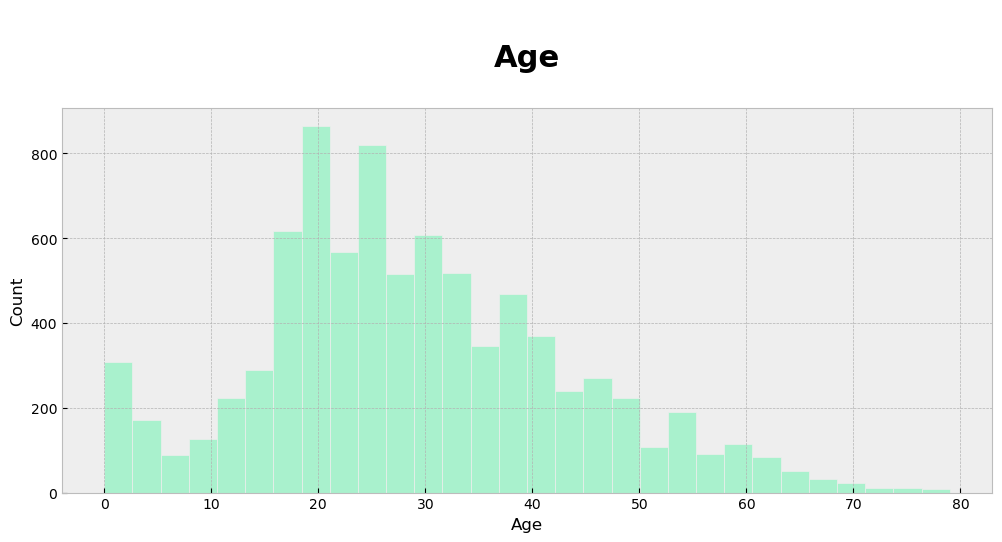

In [51]:
hist_plot(train_set,'Age')

[129]


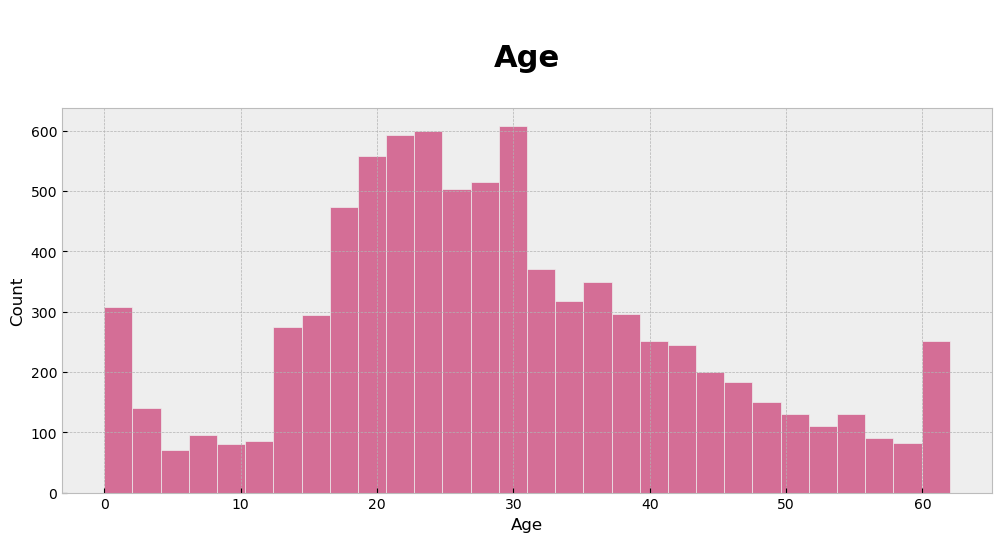

In [52]:
train_set['Age'] = train_set['Age'].clip(upper=62)
hist_plot(train_set,'Age')

### RoomService

[329]


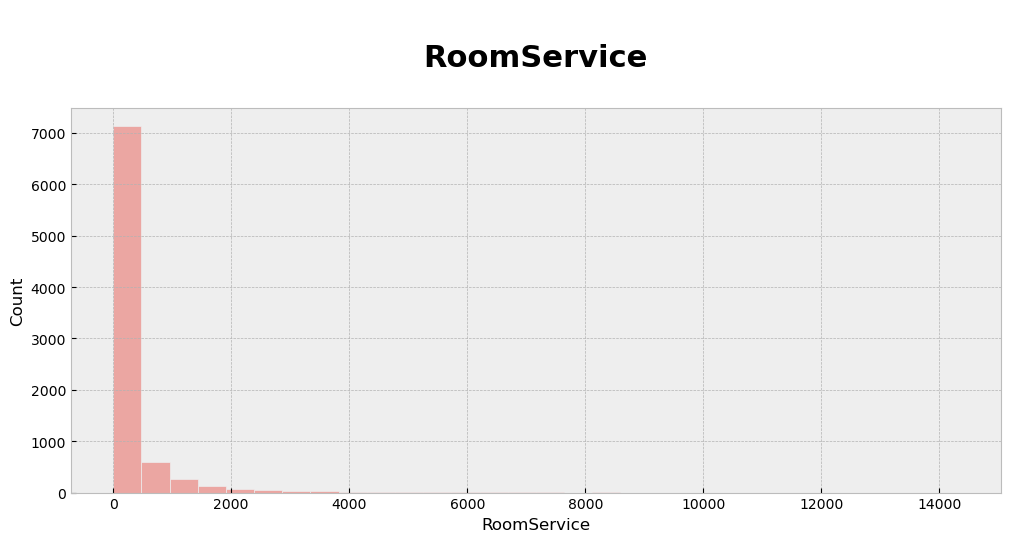

In [53]:
hist_plot(train_set, 'RoomService')

In [54]:
train_set['RoomService_cut'] = train_set['RoomService'].clip(upper=2000)

[361]


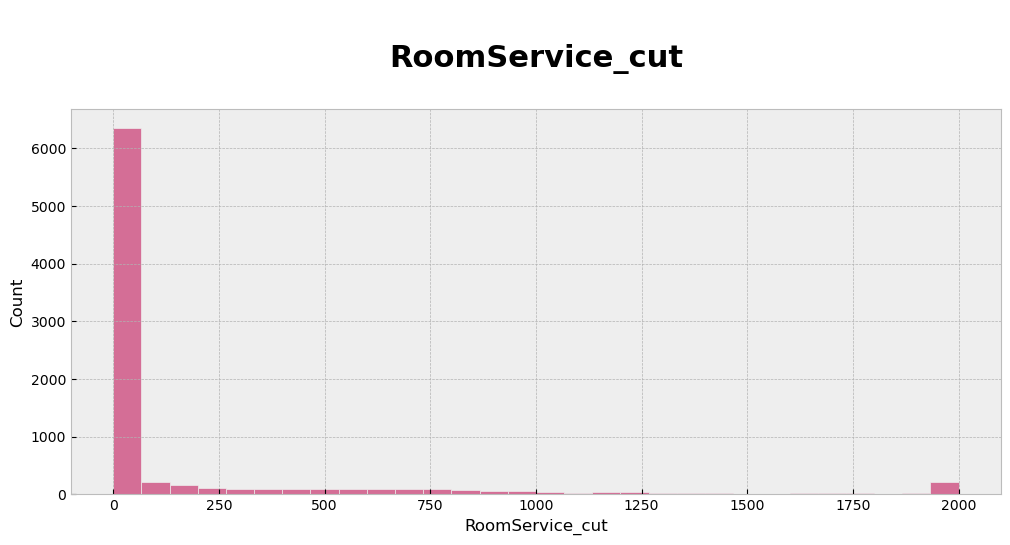

In [55]:
hist_plot(train_set, 'RoomService_cut')

In [56]:
train_set['RoomService_bin'] = pd.cut(train_set['RoomService'], bins=[-1, 1, 500, 16000], labels=['a','b','c'])

[332]


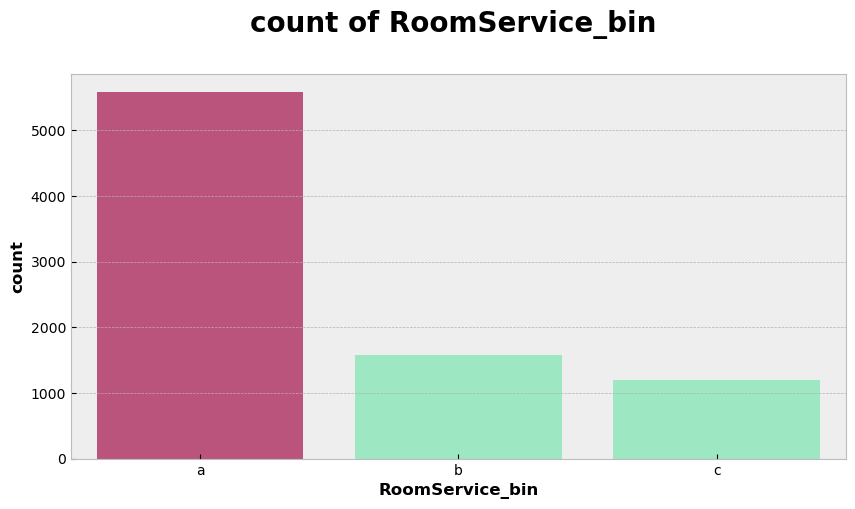

,count,percentage
a,5585,65.64
b,1578,18.55
c,1193,14.02


In [57]:
count_plot(train_set, 'RoomService_bin')

#### FoodCourt

[323]


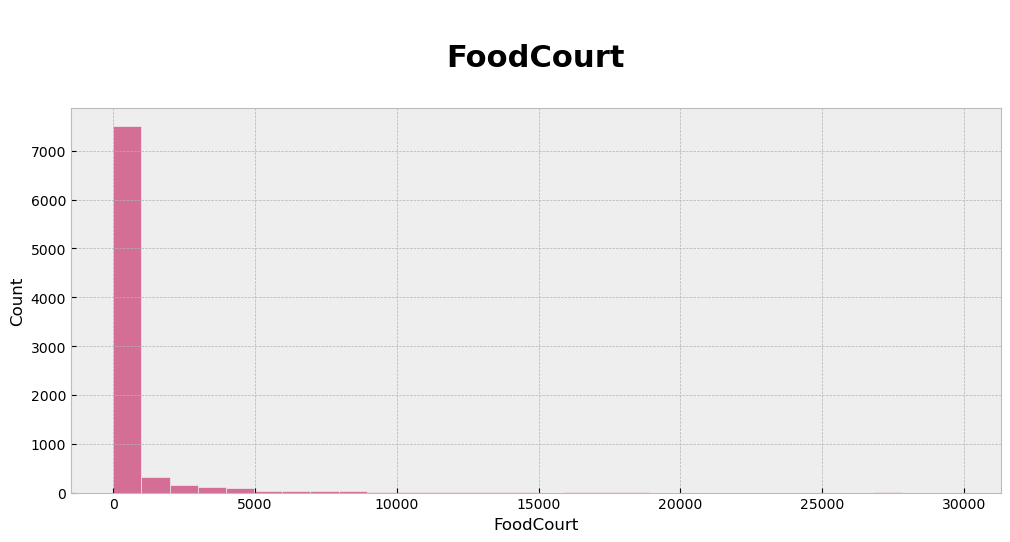

In [58]:
hist_plot(train_set, 'FoodCourt')

In [59]:
train_set['FoodCourt_bin'] = pd.cut(train_set['FoodCourt'], bins=[-1, 1, 500, 30000], labels=['a','b','c'])

[430]


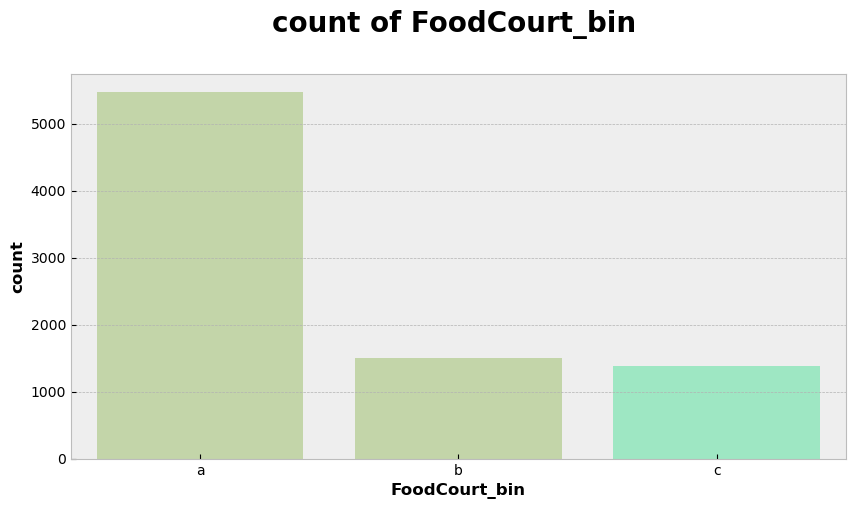

,count,percentage
a,5475,64.34
b,1508,17.72
c,1380,16.22


In [60]:
count_plot(train_set, 'FoodCourt_bin')

#### ShoppingMall

[333]


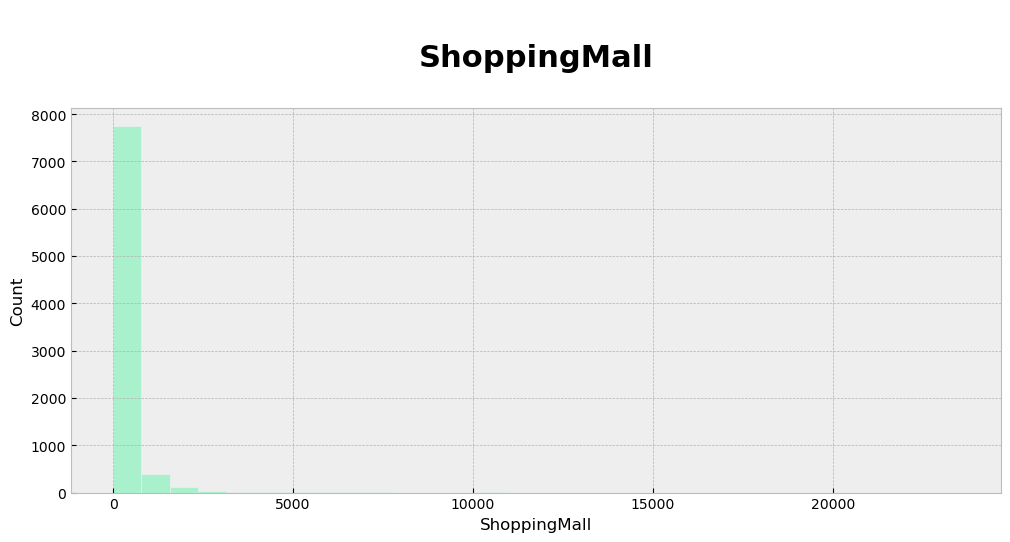

In [61]:
hist_plot(train_set, 'ShoppingMall')

In [62]:
train_set['ShoppingMall_bin'] = pd.cut(train_set['ShoppingMall'], bins=[-1, 1, 500, 25000], labels=['a','b','c'])

[435]


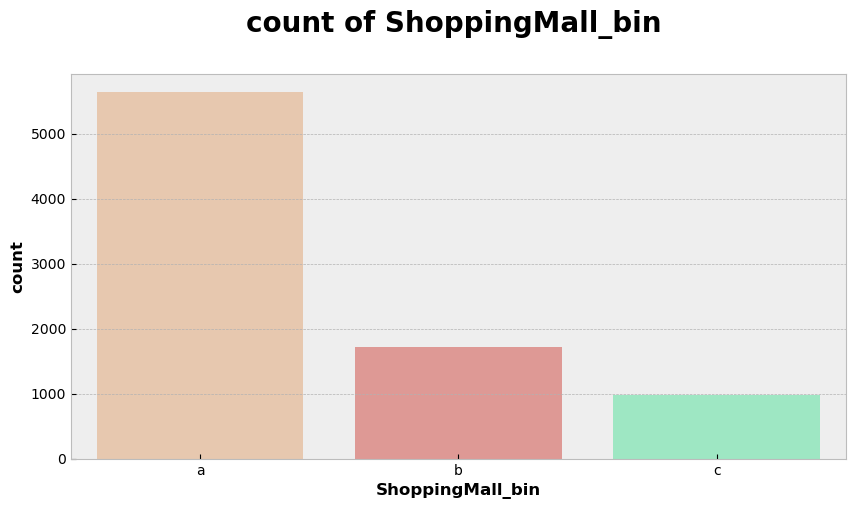

,count,percentage
a,5640,66.28
b,1721,20.23
c,982,11.54


In [63]:
count_plot(train_set, 'ShoppingMall_bin')

#### Spa

[224]


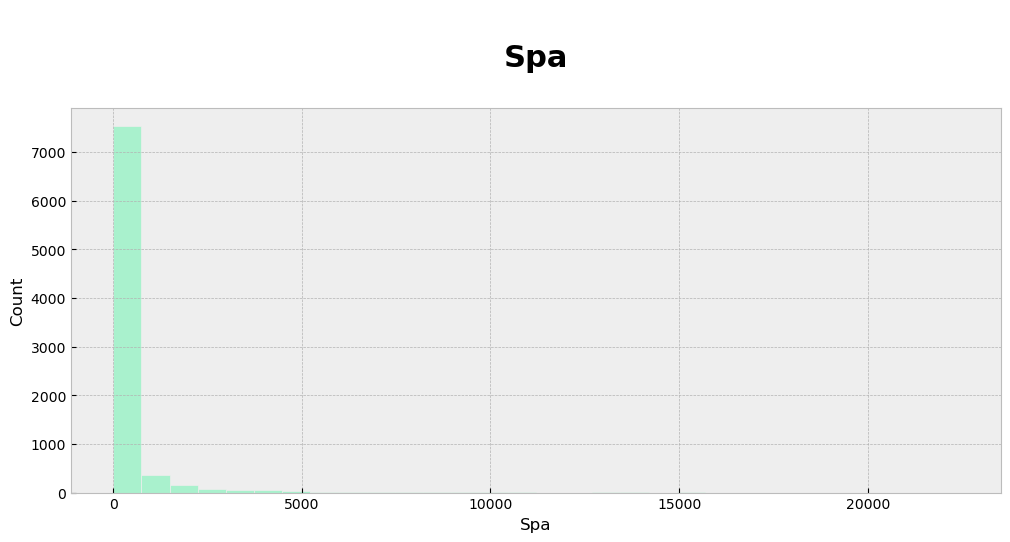

In [64]:
hist_plot(train_set, 'Spa')

In [65]:
train_set['Spa_bin'] = pd.cut(train_set['Spa'], bins=[-1, 1, 500, 25000], labels=['a','b','c'])

[205]


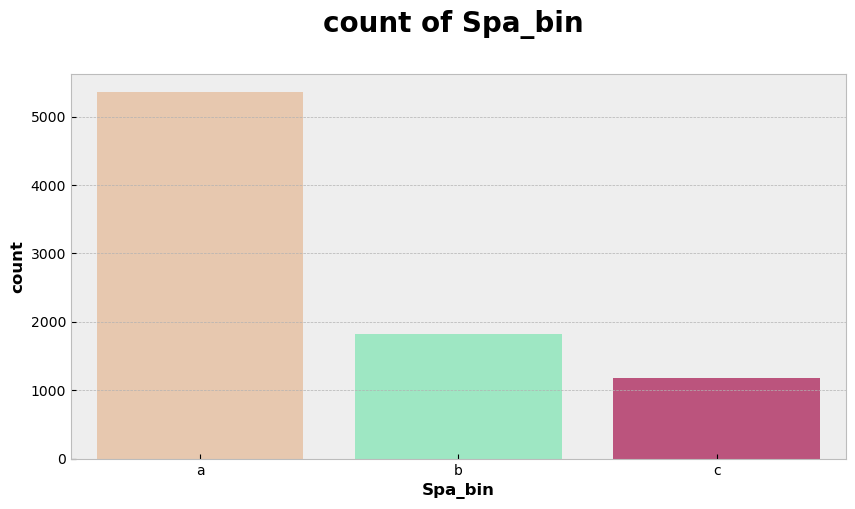

,count,percentage
a,5361,63.00
b,1820,21.39
c,1174,13.80


In [66]:
count_plot(train_set, 'Spa_bin')

#### VRDeck

[477]


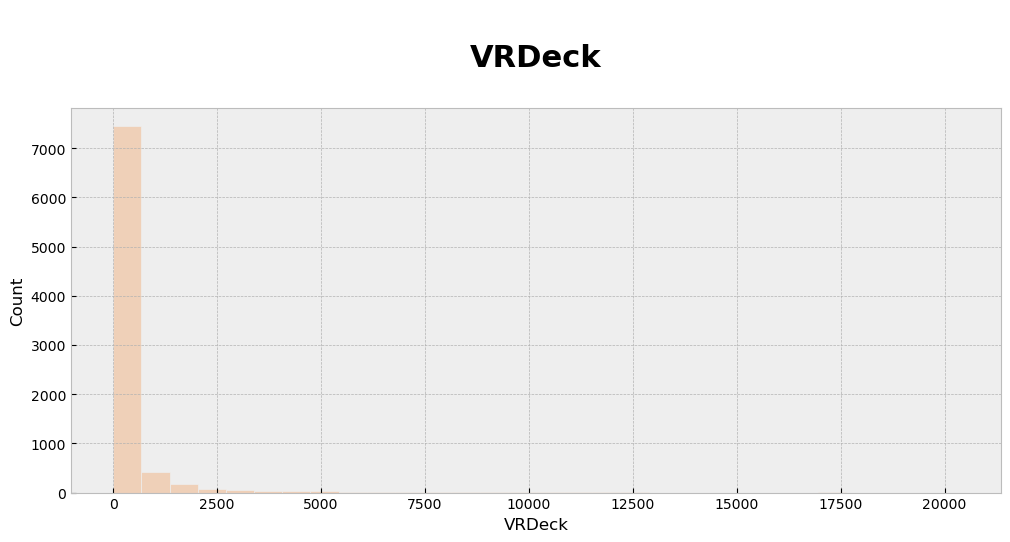

In [67]:
hist_plot(train_set, 'VRDeck')

In [68]:
train_set['VRDeck_bin'] = pd.cut(train_set['VRDeck'], bins=[-1, 1, 500, 25000], labels=['a','b','c'])

[103]


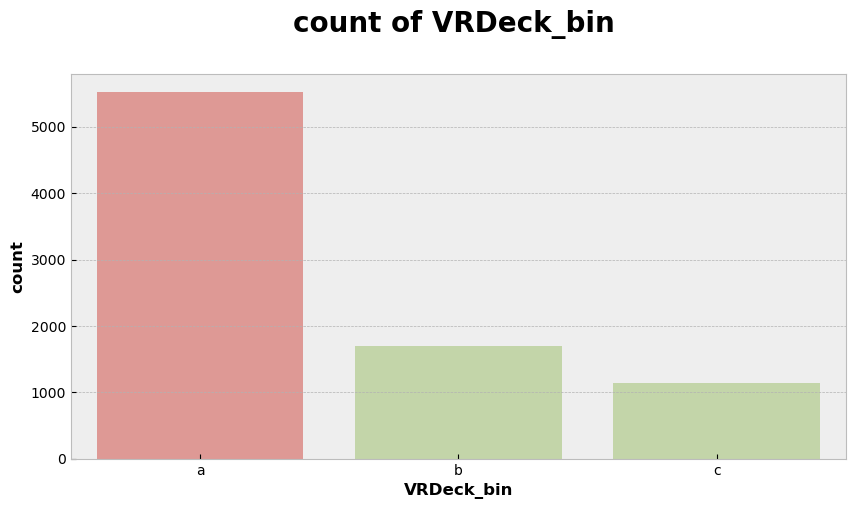

,count,percentage
a,5526,64.94
b,1695,19.92
c,1133,13.32


In [69]:
count_plot(train_set, 'VRDeck_bin')

## Dimension Reduction

### Cabin zone

[313]


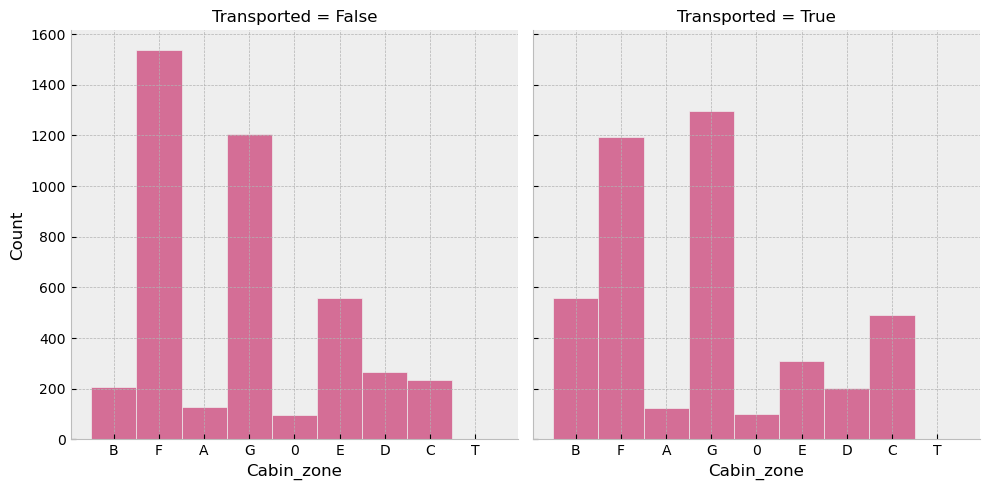

[426]


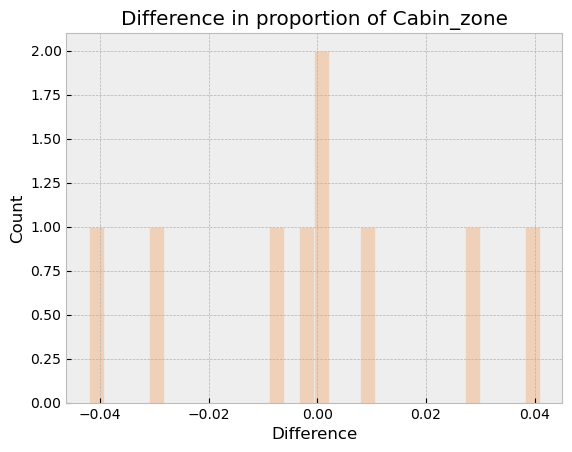

,F,G,E,B,C,D,A,0,T
% Cabin_zone Start,0.320837,0.293807,0.102245,0.090022,0.085556,0.054883,0.029381,0.022799,0.000470
% Cabin_zone Transp,0.278830,0.303158,0.072515,0.130994,0.115322,0.047018,0.028772,0.023158,0.000234
Difference,-0.042006,0.009351,-0.029730,0.040972,0.029765,-0.007866,-0.000609,0.000359,-0.000236


In [70]:
dis_plot(train_set,'Cabin_zone')

In [71]:
train_set['Cabin_zone'] = train_set['Cabin_zone'].replace(['A','0','T','G'],'A')

[46]


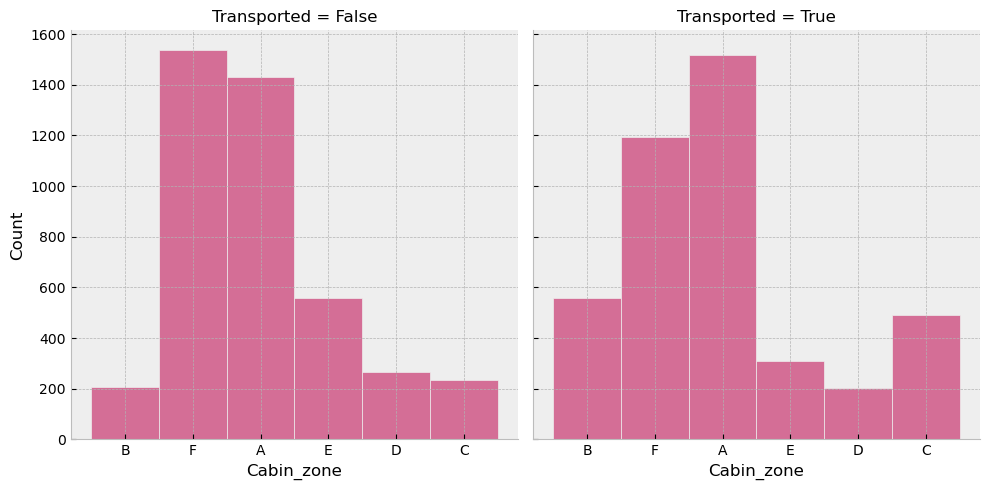

[372]


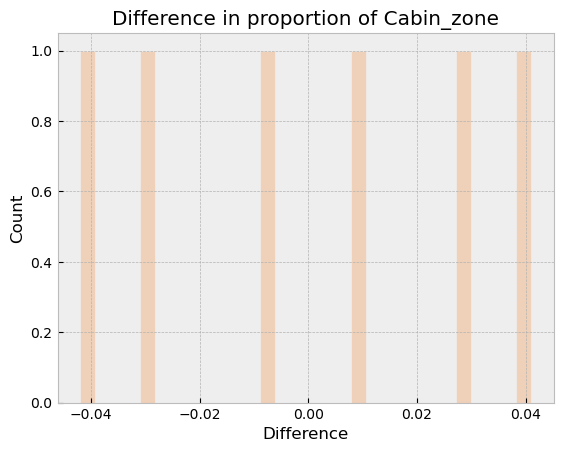

,A,F,E,B,C,D
% Cabin_zone Start,0.346457,0.320837,0.102245,0.090022,0.085556,0.054883
% Cabin_zone Transp,0.355322,0.278830,0.072515,0.130994,0.115322,0.047018
Difference,0.008865,-0.042006,-0.029730,0.040972,0.029765,-0.007866


In [72]:
dis_plot(train_set,'Cabin_zone')

In [73]:
train_set['Cabin_zone'] = train_set['Cabin_zone'].replace('A', 'D')

[175]


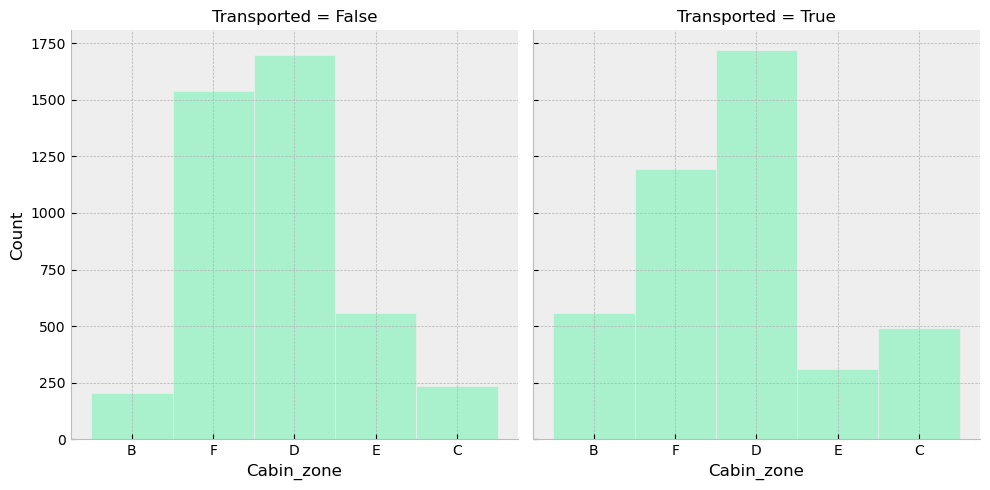

[84]


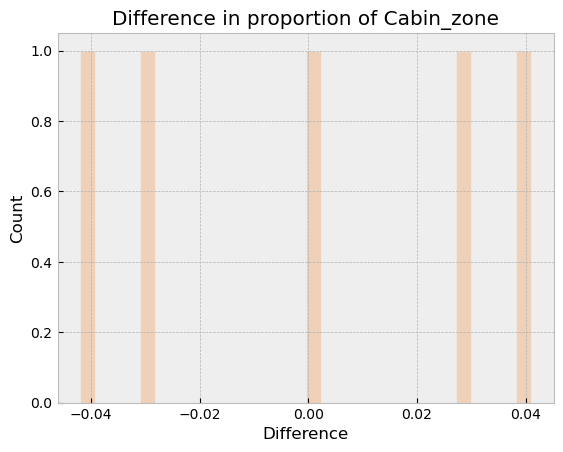

,D,F,E,B,C
% Cabin_zone Start,0.401340,0.320837,0.102245,0.090022,0.085556
% Cabin_zone Transp,0.402339,0.278830,0.072515,0.130994,0.115322
Difference,0.000999,-0.042006,-0.029730,0.040972,0.029765


In [74]:
dis_plot(train_set,'Cabin_zone')

## Feature Engineering

### FoodCourt & Spa

In [75]:
def binary_for_0(x):
    if x==0:
        value = 1
    else:
        value = 0
    return value

In [76]:
train_set['FoodCourtZero'] = train_set['FoodCourt'].apply(binary_for_0)
train_set['SpaZero'] = train_set['Spa'].apply(binary_for_0)

In [77]:
train_set['FoodCourtZero'].value_counts()

1    5359
0    3150
Name: FoodCourtZero, dtype: int64

In [78]:
train_set['SpaZero'].value_counts()

1    5218
0    3291
Name: SpaZero, dtype: int64

In [79]:
def binary_less_4(x):
    if x <= 4:
        value = 1
    else:
        value = 0
    return value

### Age_less4

In [80]:
train_set['Age_less4'] = train_set['Age'].apply(binary_less_4)

In [81]:
train_set['Age_less4'].value_counts()

0    8062
1     447
Name: Age_less4, dtype: int64

## Build the full transformer

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['Cabin'] = X['Cabin'].fillna('0')
        X['Cabin'] = X['Cabin'].str.split('/')
        X['Cabin_zone'] = X['Cabin'].apply(get_cabin)
        X['Cabin_code'] = X['Cabin'].apply(get_code)
        """inds_drop=[]
        for col1 in X.columns:
            for col2 in X.columns:
                if col1 != col2:
                    for col3 in X.columns:
                        if col2 != col3:
                            inds = X[(X[col1].isnull()) & (X[col2].isnull()) & (X[col3].isnull())].index
                            print(col1,col2,col3,inds)
                            for i in inds:
                                inds_drop.append(i)                                
        X = X.drop(inds_drop)"""
        X['Age'] = X['Age'].clip(upper=62)
        X['RoomService_cut'] = X['RoomService'].clip(upper=2000)
        X['FoodCourt_cut'] = X['FoodCourt'].clip(upper=5000)
        X['Spa_cut'] = X['Spa'].clip(upper=5000)
        X['VRDeck_cut'] = X['VRDeck'].clip(upper=2500)
        X['ShoppingMall_cut'] = X['ShoppingMall'].clip(upper=2500)
        X['RoomService_bin'] = pd.cut(X['RoomService'], bins=[-1, 1, 500, 16000], labels=['a','b','c'])
        X['FoodCourt_bin'] = pd.cut(X['FoodCourt'], bins=[-1, 1, 500, 30000], labels=['a','b','c'])
        X['ShoppingMall_bin'] = pd.cut(X['ShoppingMall'], bins=[-1, 1, 500, 25000], labels=['a','b','c'])
        X['Spa_bin'] = pd.cut(X['Spa'], bins=[-1, 1, 500, 25000], labels=['a','b','c'])
        X['VRDeck_bin'] = pd.cut(X['VRDeck'], bins=[-1, 1, 500, 25000], labels=['a','b','c'])
        X['Cabin_zone'] = X['Cabin_zone'].replace(['A','0','T','G'],'A')
        X['Cabin_zone'] = X['Cabin_zone'].replace('A', 'D')
        X['FoodCourtZero'] = X['FoodCourt'].apply(binary_for_0)
        X['SpaZero'] = X['Spa'].apply(binary_for_0)
        X['Age_less4'] = X['Age'].apply(binary_less_4)
        return X
    
attr_transf = AttributesTransformer()

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

num_columns = ['Age', "RoomService_cut", "FoodCourt_cut", "Spa_cut", "VRDeck_cut", "ShoppingMall_cut"]
onehot_cat_columns = ['HomePlanet','Destination','Cabin_code','Cabin_zone', 'RoomService_bin', 'FoodCourt_bin', 'Spa_bin', 'VRDeck_bin', 'ShoppingMall_bin', 'FoodCourtZero', 'SpaZero', 'Age_less4']
ord_cat_columns = ['VIP', 'CryoSleep']

cat_columns = onehot_cat_columns + ord_cat_columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_columns),
    ("one_hot_cat", OneHotEncoder(), onehot_cat_columns),
    ("ord_cat", OrdinalEncoder(), ord_cat_columns),
])

## Prepare the data

In [84]:
X_train = attr_transf.fit_transform(df)
y_train = X_train['Transported']
X_train = X_train.drop('Transported', axis=1)
X_train.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
mode = X_train[cat_columns].mode().iloc[0]
X_train[cat_columns] = X_train[cat_columns].fillna(mode)
X_prepared = full_pipeline.fit_transform(X_train)

In [85]:
X_prepared.shape

(8693, 43)

In [86]:
print(np.sum(np.isnan(X_prepared)))

0


## Define grid_search() function

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [88]:
def grid_search(model, param_grid, seed=None, cv=3, hue_feat=None):
    grid = GridSearchCV(model, param_grid, 
                    scoring=make_scorer(accuracy_score),
                    cv=cv, verbose=3, n_jobs=64)

    grid.fit(X_prepared, y_train)
    # df_results = pd.DataFrame(grid.cv_results_).sort_values('mean_test_score', ascending=False).head()
    df_tmp = pd.DataFrame(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

    df_summary = pd.DataFrame()
    mn_ts_scores = []
    for i, row in df_tmp.iterrows():
        mn_ts_scores.append(row[1])
        # print(row[0])
        df_tmp = pd.DataFrame(row[0], index=[0])
        df_summary = pd.concat([df_summary, df_tmp])
    df_summary['mean test score'] = mn_ts_scores
    df_summary = df_summary.reset_index(drop=True)
    print(df_summary.head())

    print(df_summary.columns)
    sns.pairplot(data=df_summary, hue=hue_feat, palette=r_color(len(df_summary[hue_feat].value_counts()), seed=seed))
    plt.show()
    return df_summary.head(10)

In [89]:
# Prepare ML classification models
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier

In [90]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_prepared, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75100633 0.7613571  0.75675676 0.77502877 0.77042578]
0.7629149458936693


In [91]:
sgd = SGDClassifier()
cv = cross_val_score(sgd, X_prepared, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76768258 0.7786084  0.78838413 0.78941312 0.79746835]
0.784311314717994


In [92]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_prepared,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77170788 0.79183439 0.79125934 0.79516686 0.8009206 ]
0.7901778133935419


In [93]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_prepared,y_train,cv=5)
print(cv)
print(cv.mean())

[0.719954   0.72570443 0.75215641 0.73762946 0.7301496 ]
0.7331187784998721


In [94]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_prepared,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74755607 0.77113283 0.78320874 0.77733026 0.77560414]
0.7709664099375922


In [95]:
lin_svc = LinearSVC()
cv = cross_val_score(lin_svc, X_prepared, y_train, cv=5)
print(cv)
print(cv.mean())

[0.77573318 0.79355952 0.79355952 0.79516686 0.80322209]
0.7922482333470752


In [96]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_prepared, y_train, cv=5)
print(cv)
print(cv.mean())

[0.7826337  0.7906843  0.79815986 0.81070196 0.80207135]
0.7968502326972566


In [97]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_prepared,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77515814 0.77745831 0.79240943 0.79171461 0.78250863]
0.7838498244100183


In [98]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_prepared,y_train,cv=5)
print(cv)
print(cv.mean())

[12:46:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [99]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(voting_clf,X_prepared,y_train,cv=5)
print(cv)
print(cv.mean())

[12:47:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [100]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [101]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_prepared,y_train)
clf_performance(best_clf_lr,'LR')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
LR
Best Score: 0.7922481671741031
Best Parameters: {'C': 0.012742749857031334, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [102]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_prepared,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7859218986878561
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [103]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_prepared,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 44 candidates, totalling 220 fits
SVC
Best Score: 0.7985746341792666
Best Parameters: {'C': 100, 'degree': 2, 'kernel': 'poly'}


In [104]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_prepared,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.7978868984794112
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


In [105]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_prepared,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[16:15:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score: 0.7919038691998562
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.6}


In [106]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_prepared,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_prepared,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_prepared,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_prepared,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_prepared,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_prepared,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_prepared,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_prepared,y_train,cv=5).mean())

voting_clf_hard : [0.77745831 0.79298447 0.80506038 0.81703107 0.81127733]
voting_clf_hard mean : 0.800762312639501
voting_clf_soft : [0.78033353 0.7947096  0.80563542 0.8118527  0.80955121]
voting_clf_soft mean : 0.800186409262628
voting_clf_all : [0.7826337  0.79700978 0.80851064 0.81127733 0.80782509]
voting_clf_all mean : 0.8016814552230658
[17:01:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:08:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

In [ ]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_prepared,y_train)
clf_performance(best_clf_weight,'VC Weights')

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [ ]:
best_model = voting_clf_hard.fit(X_prepared, y_train)

In [ ]:
X_test = test_set.copy()

In [ ]:
X_test.info()

In [ ]:
X_test = attr_transf.transform(X_test)
X_test.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
mode = X_test[cat_columns].mode().iloc[0]
X_test[cat_columns] = X_test[cat_columns].fillna(mode)
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
np.isnan(X_test_prepared).any()

In [ ]:
y_hat = best_model.predict(X_test_prepared)

In [ ]:
y_hat.shape

In [ ]:
df_pred = pd.DataFrame(y_hat).astype(int)
df_pred.head()

In [ ]:
df_pred.columns = ['Transported']
df_pred.head()

In [ ]:
df_pred['Transported'].replace([0,1],[False,True], inplace=True)
df_pred.head()

In [ ]:
df_pred = pd.concat([test_set['PassengerId'], df_pred], axis=1)
df_pred.head()

In [ ]:
df_pred.to_csv("submission_v2.csv", index=False)